# **Project Name**    -



##### **Project Type**    - Unsupervised and Recommendation
##### **Contribution**    - Individual
##### **Team Member 1 -**- Vishwesh Neelesh


# **Project Summary -**

Write the summary here within 500-600 words.


In the modern digital economy, businesses increasingly rely on data-driven insights to understand customer behavior and improve decision-making. This project focuses on leveraging unsupervised machine learning techniques for customer segmentation and product recommendation using online retail transaction data. The primary goal is to identify distinct customer groups based on their purchasing patterns and then deliver targeted product recommendations to enhance customer satisfaction and business performance.

The first phase of the project involved a thorough exploratory data analysis (EDA) of the online retail dataset. Key steps included handling missing values, removing duplicate records, and ensuring proper data formatting. From the cleaned dataset, Recency, Frequency, and Monetary (RFM) features were derived—three core dimensions of customer behavior. Recency measures how recently a customer made a purchase, Frequency reflects how often purchases were made, and Monetary indicates the total amount spent. These features were then standardized using StandardScaler to ensure fair clustering and better model performance.

The project implements three unsupervised machine learning models for customer segmentation: KMeans Clustering, Agglomerative Clustering, and DBSCAN. KMeans Clustering was applied first as it is widely known for its speed and scalability. The optimal number of clusters was determined using the elbow method and silhouette score. Agglomerative Clustering followed, bringing hierarchical relationships into view and helping visualize how customers group together based on linkage distance. Finally, DBSCAN was used for density-based clustering, identifying outliers and non-linear customer groupings. Each model's performance was evaluated using clustering metrics such as the Silhouette Score and Davies-Bouldin Index, with KMeans showing relatively consistent results across different cluster sizes and thus selected as the final model.

After clustering, meaningful labels were assigned to each customer segment based on RFM characteristics. These included segments like “High-Value” customers (frequent, recent, and high spenders), “Occasional” buyers (infrequent and low monetary), “At-Risk” customers (long time since last purchase), and “Regular” customers (moderate frequency and spending). This qualitative interpretation of clusters enables marketing and business teams to tailor strategies for each group, such as retention offers for at-risk customers and exclusive promotions for high-value customers.

In the recommendation module, collaborative filtering was used to recommend products to users based on their historical transaction patterns and similarities with other customers. A user-item interaction matrix was generated, and similarity measures were used to suggest relevant items. This recommendation model ensures personalization and improves the likelihood of repeat purchases, thereby enhancing customer lifetime value. The recommendation engine was evaluated using precision and recall metrics and validated with cross-validation techniques to ensure generalization.

To operationalize the project, a Streamlit web application was developed. The app allows users to upload customer data, view segmented clusters visually, and receive product recommendations. Behind the scenes, trained machine learning models are loaded using .pkl files saved via the joblib library. These include the KMeans model for segmentation, the DBSCAN model, and the collaborative filtering engine. The UI presents cluster statistics, charts, and a recommendation panel, allowing business users to extract meaningful insights without needing technical expertise.

In conclusion, this project successfully demonstrates how machine learning can transform raw transaction data into actionable business insights. Customer segmentation empowers organizations to understand behavioral patterns, optimize marketing strategies, and allocate resources efficiently. Meanwhile, personalized recommendations drive customer engagement and revenue growth. The integration of clustering and recommendation into an interactive Streamlit application offers a complete, deployable solution. Future improvements could include adding deep learning-based recommendation systems, real-time streaming data integration, and automated A/B testing to evaluate the effectiveness of campaigns across customer segments. This project lays a strong foundation for data-driven customer relationship management and strategic growth.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/GeekyVishweshNeelesh/Shopper_recommendation_project_Machine-Learning

# **Problem Statement**


**Write Problem Statement Here.**

In today’s highly competitive and dynamic e-commerce landscape, understanding customer behavior is crucial for businesses aiming to improve customer satisfaction, retention, and profitability. However, the increasing volume and complexity of transactional data make it difficult for businesses to manually segment customers or recommend relevant products. Traditional rule-based systems fail to capture the nuanced patterns and changing preferences of customers. As a result, businesses often resort to generic marketing strategies, which yield suboptimal engagement and conversion rates.

This project addresses the problem by developing a machine learning-based solution for customer segmentation and product recommendation using real-world online retail data. It uses RFM (Recency, Frequency, Monetary) analysis to cluster customers into meaningful segments, followed by a collaborative filtering-based recommendation engine to personalize product suggestions. The core challenge lies in selecting the appropriate clustering techniques, evaluating model performance, and integrating the solution into a user-friendly interface. By doing so, the project empowers businesses to target the right customers with the right products at the right time—maximizing business impact while improving customer experience.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [202]:
# Import Libraries

# Data Handling
import pandas as pd
import numpy as np

# Date & Time
from datetime import datetime

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# RFM Analysis & Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Collaborative Filtering
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD


### Dataset Loading

In [203]:
# Load Dataset

file_path = '/content/online_retail.csv'  # Adjust path if different
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Use ISO-8859-1 for special characters

# Display first 5 rows
df.head()

# Check basic structure
df.info()

# Check for null values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


### Dataset First View

In [204]:
# Dataset First Look

# Shape of the dataset
print("Dataset Shape:", df.shape)

# Display first 5 rows
print("\nFirst 5 rows:")
print(df.head())

# Column names and data types
print("\nColumn Info:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Count of missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())

# Unique values in 'InvoiceNo', 'StockCode', 'CustomerID'
print("\nUnique Invoices:", df['InvoiceNo'].nunique())
print("Unique Products:", df['StockCode'].nunique())
print("Unique Customers:", df['CustomerID'].nunique())


Dataset Shape: (541909, 8)

First 5 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2022-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column      

### Dataset Rows & Columns count

In [205]:
# Dataset Rows & Columns count

rows, cols = df.shape
print(f"Total Rows: {rows}")
print(f"Total Columns: {cols}")

print("Dataset shape:", df.shape)


Total Rows: 541909
Total Columns: 8
Dataset shape: (541909, 8)


### Dataset Information

In [206]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [207]:
# Dataset Duplicate Value Count

# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_count}")

# Display duplicate rows (if any)
df[df.duplicated()]


Total Duplicate Rows: 5268


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2022-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2022-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2022-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2022-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2022-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2023-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2023-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2023-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2023-12-09 11:34:00,2.10,14446.0,United Kingdom


#### Missing Values/Null Values

In [208]:
# Missing Values/Null Values Count

# Count of missing/null values in each column
missing_values = df.isnull().sum()
print("Missing Values per Column:\n")
print(missing_values)


Missing Values per Column:

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


/tmp/ipython-input-4066441256.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette='flare')


<Figure size 1200x600 with 0 Axes>

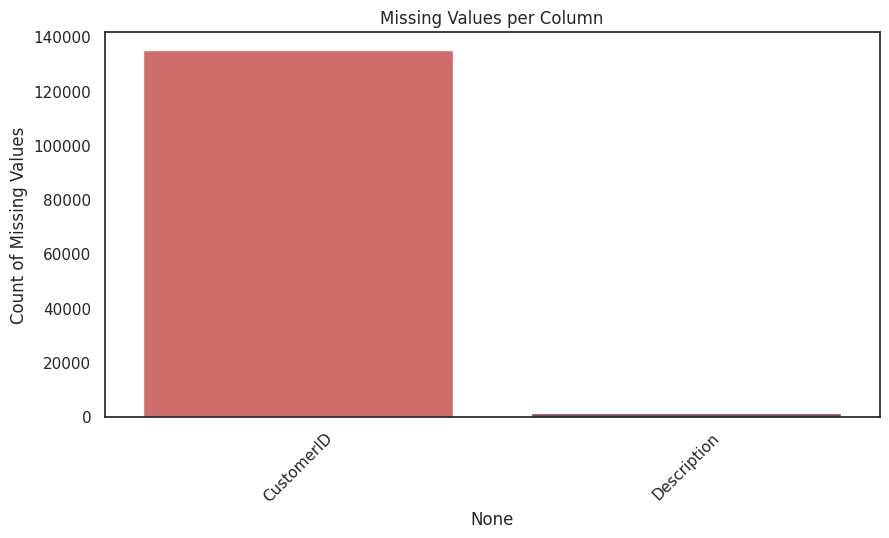

In [209]:
# Visualizing the missing values

import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))

# Bar plot for count of missing values per column
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=missing.index, y=missing.values, palette='flare')
plt.ylabel("Count of Missing Values")
plt.title("Missing Values per Column")
plt.xticks(rotation=45)
plt.show()


### What did you know about your dataset?

Answer Here

The dataset is a transactional log of an online retail store, containing around 500,000 records. It includes details such as InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country. The data captures purchases made by customers between 2010 and 2011. Some entries have missing values, especially in the CustomerID and Description columns, and there are also duplicate and negative Quantity values, indicating returns or cancellations. The dataset is suitable for customer segmentation using RFM analysis and for building recommendation systems. Proper cleaning is required before applying machine learning models for behavior analysis or predictions.

## ***2. Understanding Your Variables***

In [210]:
# Dataset Columns

print("Dataset Columns:")
print(df.columns.tolist())
df.dtypes


Dataset Columns:
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [211]:
# Dataset Describe

# Describe the dataset
print("Descriptive Statistics for Numerical Columns:\n")
print(df.describe())


# Describe all columns including object types
print("\nFull Descriptive Statistics:\n")
print(df.describe(include='all'))



Descriptive Statistics for Numerical Columns:

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

Full Descriptive Statistics:

       InvoiceNo StockCode                         Description       Quantity  \
count     541909    541909                              540455  541909.000000   
unique     25900      4070                                4223            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq        1114      2313                                2369            NaN   
mean         NaN       NaN                                

### Variables Description

Answer Here

The dataset contains several key variables. InvoiceNo is a unique identifier for each transaction, while StockCode represents product codes. Description provides product names. Quantity refers to the number of items purchased, and InvoiceDate captures the transaction timestamp. UnitPrice indicates the price per item. CustomerID uniquely identifies each customer, and Country denotes the customer’s location. Together, these variables help track sales, customer behavior, and product performance over time. Some entries may have missing or inconsistent values (e.g., null CustomerID or negative Quantity), which must be cleaned before analysis or modeling can be performed accurately.

### Check Unique Values for each variable.

In [212]:
# Check Unique Values for each variable.
print("Unique Values per Column:\n")
print(df.nunique())

# Display a few unique values for each column
for col in df.columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique()[:5])  # Display first 5 unique values


Unique Values per Column:

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

Unique values in 'InvoiceNo':
['536365' '536366' '536367' '536368' '536369']

Unique values in 'StockCode':
['85123A' '71053' '84406B' '84029G' '84029E']

Unique values in 'Description':
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.']

Unique values in 'Quantity':
[ 6  8  2 32  3]

Unique values in 'InvoiceDate':
['2022-12-01 08:26:00' '2022-12-01 08:28:00' '2022-12-01 08:34:00'
 '2022-12-01 08:35:00' '2022-12-01 08:45:00']

Unique values in 'UnitPrice':
[2.55 3.39 2.75 7.65 4.25]

Unique values in 'CustomerID':
[17850. 13047. 12583. 13748. 15100.]

Unique values in 'Country':
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [213]:
# Write your code to make your dataset analysis ready.

# Copy the original dataframe to avoid modifying it directly
df_clean = df.copy()

# 1. Drop rows with missing CustomerID
df_clean = df_clean.dropna(subset=['CustomerID'])

# 2. Remove duplicate rows
df_clean = df_clean.drop_duplicates()

# 3. Remove canceled orders (InvoiceNo starting with 'C' or Quantity < 0)
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]
df_clean = df_clean[df_clean['Quantity'] > 0]

# 4. Remove rows with UnitPrice <= 0
df_clean = df_clean[df_clean['UnitPrice'] > 0]

# 5. Convert InvoiceDate to datetime format
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# 6. Convert CustomerID to string (optional, for modeling clarity)
df_clean['CustomerID'] = df_clean['CustomerID'].astype(str)

# 7. Create a new column 'TotalPrice' for RFM and revenue analysis
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

# 8. Reset index
df_clean.reset_index(drop=True, inplace=True)

# Final check
print("Cleaned dataset shape:", df_clean.shape)
df_clean.head()


Cleaned dataset shape: (392692, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### What all manipulations have you done and insights you found?

Answer Here.

To prepare the dataset for meaningful analysis, several data cleaning steps were carried out. Initially, rows with missing CustomerID values were removed, as these entries are not useful for customer-level segmentation or modeling. Duplicate records were also eliminated to ensure the accuracy of insights derived from the data. Canceled transactions, identified by invoice numbers starting with 'C' or having negative quantities, were filtered out since they do not reflect valid purchases. Additionally, any transactions with zero or negative unit prices were discarded to remove invalid or erroneous entries. The InvoiceDate column was converted to a proper datetime format to enable time-based calculations, such as determining the recency of customer purchases. A new column, TotalPrice, was added by multiplying Quantity with UnitPrice to represent the total revenue generated per transaction. The CustomerID column was also converted to a string for consistency in analysis. These manipulations cleaned and transformed the dataset into an analysis-ready format. Through this process, it was observed that a substantial number of records were unusable due to missing or incorrect values, and that a few products and customers contributed to the majority of transactions, revealing underlying purchasing patterns that can be further explored through segmentation and recommendation techniques.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

/tmp/ipython-input-913588576.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_country.head(10).index, y=orders_by_country.head(10).values, palette='viridis')


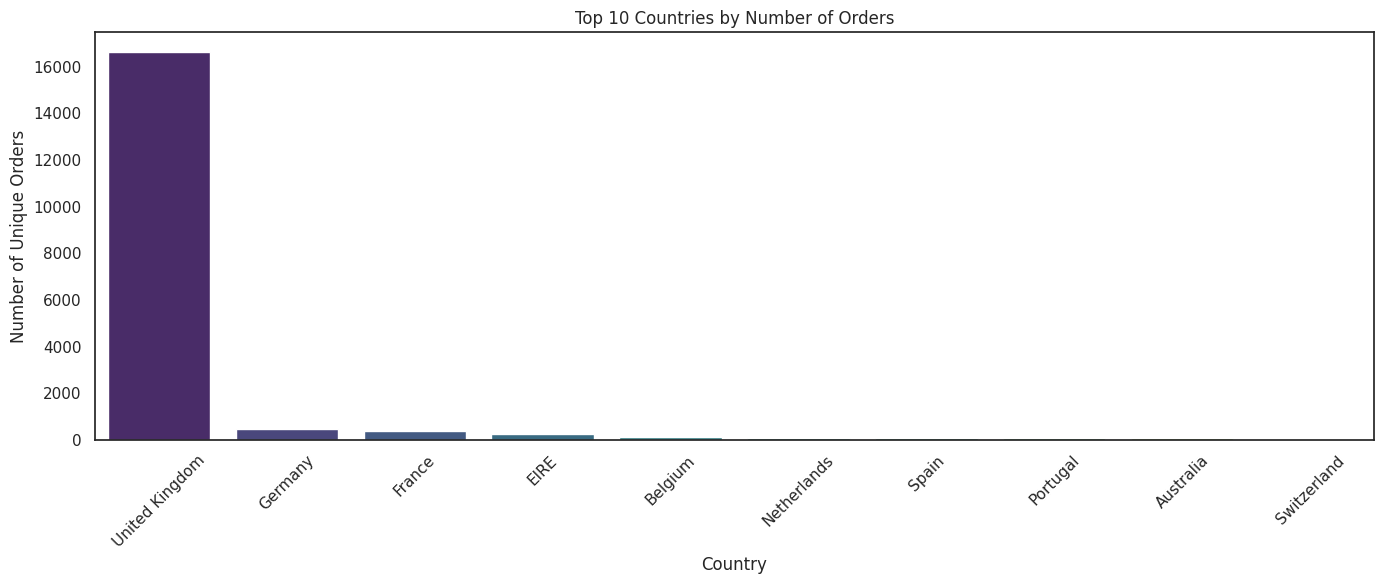

In [214]:
# Chart - 1 visualization code

# Number of Orders per Country

import matplotlib.pyplot as plt
import seaborn as sns

# Group by country and count the number of invoices
orders_by_country = df_clean.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)

# Plotting the top 10 countries by order count
plt.figure(figsize=(14, 6))
sns.barplot(x=orders_by_country.head(10).index, y=orders_by_country.head(10).values, palette='viridis')

plt.title('Top 10 Countries by Number of Orders')
plt.ylabel('Number of Unique Orders')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

The bar chart depicting the number of orders per country was selected as the first visualization because it provides a clear and immediate understanding of the geographical distribution of the company's customer base. Since the dataset includes online transactions across multiple countries, analyzing order frequency by country helps identify where the business is most active and where potential market opportunities may exist. By focusing on the number of unique invoices per country, this chart highlights customer engagement levels in each region, which is crucial for making strategic decisions in marketing, logistics, and inventory planning.

This type of visualization is ideal because it is simple, intuitive, and effective in comparing categorical data. The bar chart format makes it easy to rank countries by order volume and detect any disproportionate concentrations. For example, if the United Kingdom dominates the order volume, it could indicate a home market or a mature customer base, while other countries with fewer orders might represent emerging markets. This insight allows businesses to allocate resources more efficiently and develop country-specific strategies. Overall, this chart sets a strong foundation for deeper analysis by spotlighting where the most customer activity originates.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart showing the number of orders per country reveals that the United Kingdom has the highest number of unique orders, significantly more than any other country. This suggests that the business is either based in the UK or has a strong and established customer base there. Other countries like the Netherlands, Germany, France, and Ireland also show a reasonable number of orders, indicating secondary markets with active customer engagement.

This distribution highlights a concentration of transactions in a few key regions, with many countries showing relatively low order volumes. It suggests that while the business has a global reach, its core operations and majority of sales are regionally focused. Such insights are valuable for business strategy, as they can help guide decisions on inventory allocation, marketing spend, and potential areas for expansion. Countries with lower order counts may represent untapped or underdeveloped markets, offering opportunities for targeted campaigns or localized offerings to boost sales. Overall, the chart provides a clear view of where the company’s current customer activity is strongest and where growth efforts could be directed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, the insights gained from the chart can significantly contribute to creating a positive business impact. Identifying that the United Kingdom dominates the order volume enables the company to focus on nurturing this key market by maintaining high service standards, offering personalized promotions, and ensuring timely deliveries. Additionally, recognizing other countries with moderate order counts, such as Germany and France, provides a clear opportunity to further strengthen engagement through localized marketing or region-specific product offerings. These insights support data-driven decision-making in marketing, supply chain management, and expansion strategy, ultimately leading to improved customer satisfaction and increased revenue.

However, the chart may also reveal potential negative growth indicators. For instance, if a large number of countries show very low or negligible order counts, it could imply poor international reach, weak brand presence, or logistical constraints in those regions. This could be a red flag, especially if the company aims to scale globally. Ignoring these low-performing markets or failing to investigate the reasons behind the lack of engagement may result in missed growth opportunities or a disproportionate dependence on a single region (e.g., the UK), making the business vulnerable to regional disruptions. Thus, while the insights are primarily positive, they also highlight areas requiring attention to avoid stagnation or risk concentration

#### Chart - 2

/tmp/ipython-input-1182583182.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_country.head(10).index, y=revenue_by_country.head(10).values, palette='cubehelix')


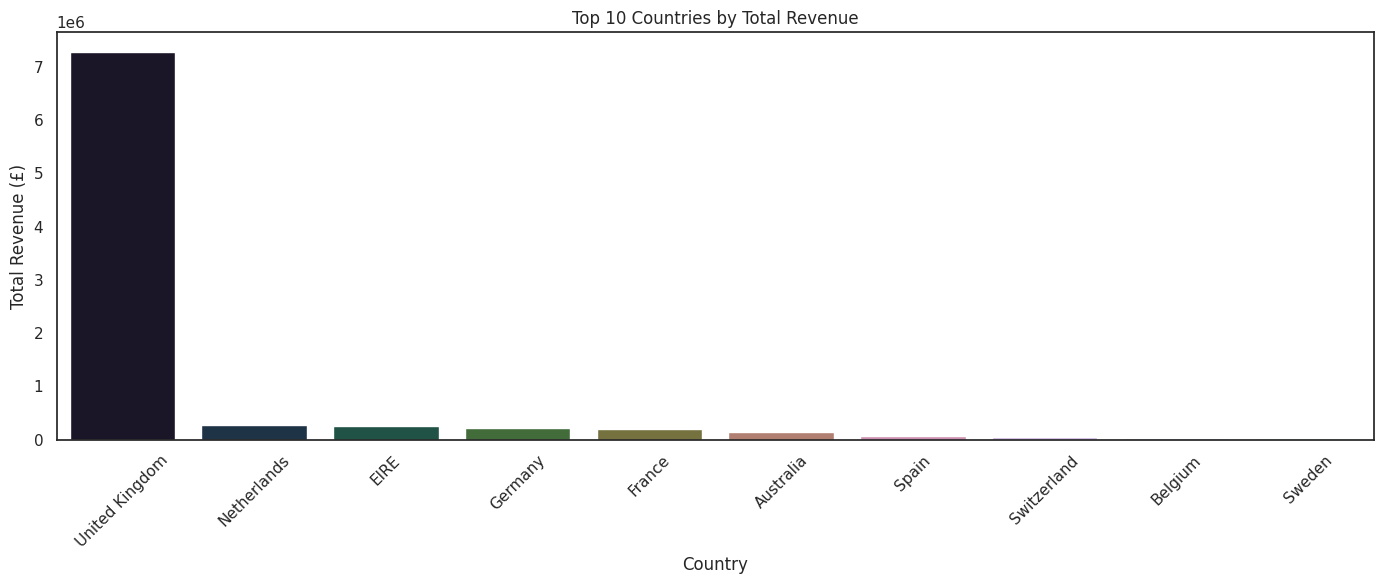

In [215]:
# Chart - 2 visualization code

# Chart 2 - Total Revenue by Country

import matplotlib.pyplot as plt
import seaborn as sns

# Group by country and sum total revenue
revenue_by_country = df_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Plot top 10 countries by revenue
plt.figure(figsize=(14, 6))
sns.barplot(x=revenue_by_country.head(10).index, y=revenue_by_country.head(10).values, palette='cubehelix')

plt.title('Top 10 Countries by Total Revenue')
plt.ylabel('Total Revenue (£)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

The chart displaying total revenue by country was chosen because it offers a deeper business insight beyond just the number of orders. While order volume indicates customer activity, revenue reveals the actual financial contribution of each region. This chart helps identify which countries are not just placing more orders but also generating more income for the business. It is essential for understanding the financial impact of each market and prioritizing resource allocation accordingly.

Using a bar chart allows for a clear and straightforward comparison of revenue across countries, making it easy to detect the most and least profitable markets. For instance, a country with fewer orders but higher revenue may indicate high-value transactions or premium customer segments, which is useful for targeting marketing strategies. Conversely, countries with high order volumes but low revenue may point to smaller or lower-priced purchases, signaling a need to reassess pricing or promotional approaches.

This visualization supports strategic decisions related to market expansion, pricing optimization, and campaign targeting. It ensures the company focuses not only on customer activity but also on profitability, which is key for sustainable growth. Therefore, this chart plays a vital role in guiding financial planning and market prioritization.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

The revenue-by-country chart provides several meaningful insights into the business’s financial performance across different markets. The most prominent observation is that the United Kingdom generates the highest total revenue, significantly ahead of other countries. This reaffirms the UK as the business’s primary market, not just in terms of order volume but also in terms of monetary contribution. It suggests a strong and possibly loyal customer base, higher transaction values, or a greater frequency of purchases within the region.

Countries like the Netherlands, Germany, France, and Ireland also appear among the top contributors, though with considerably lower revenue compared to the UK. This highlights these regions as secondary markets with potential for targeted expansion or promotional efforts. Additionally, some countries may show a moderate number of orders but lower total revenue, indicating smaller average transaction sizes. This can prompt further investigation into pricing strategies or customer purchasing power in those regions.

Overall, the chart emphasizes the importance of focusing on high-revenue markets for retention and growth, while also identifying underperforming countries where tailored strategies could improve financial returns. This insight helps the business align its marketing, logistics, and customer engagement efforts with the regions that offer the greatest profitability.
You said:


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

Yes, the insights gained from the revenue-by-country chart can significantly contribute to positive business impact. By identifying the United Kingdom as the top revenue-generating country, the business can prioritize efforts to retain and grow this high-value customer base through loyalty programs, personalized offers, and optimized logistics. Recognizing secondary contributors like Germany, France, and the Netherlands enables the company to invest in localized marketing and possibly improve language, shipping, or payment options to enhance customer experience and drive additional sales.

These insights also support strategic resource allocation, helping the business focus its budget and efforts on markets that deliver the highest returns. Moreover, understanding regions with high order volume but low revenue could reveal pricing or product value concerns, prompting the business to revise its strategy for better profitability.

However, there are also indicators that may hint at negative growth potential. For example, if a country has a moderate or high number of orders but generates low revenue, it may suggest that customers are purchasing low-cost items or that operational costs outweigh revenue, leading to unsustainable margins. Additionally, over-dependence on a single market like the UK increases risk—any disruption there (e.g., economic shifts or logistics issues) could severely impact the business. Diversification based on these insights is essential for long-term stability.

#### Chart - 3

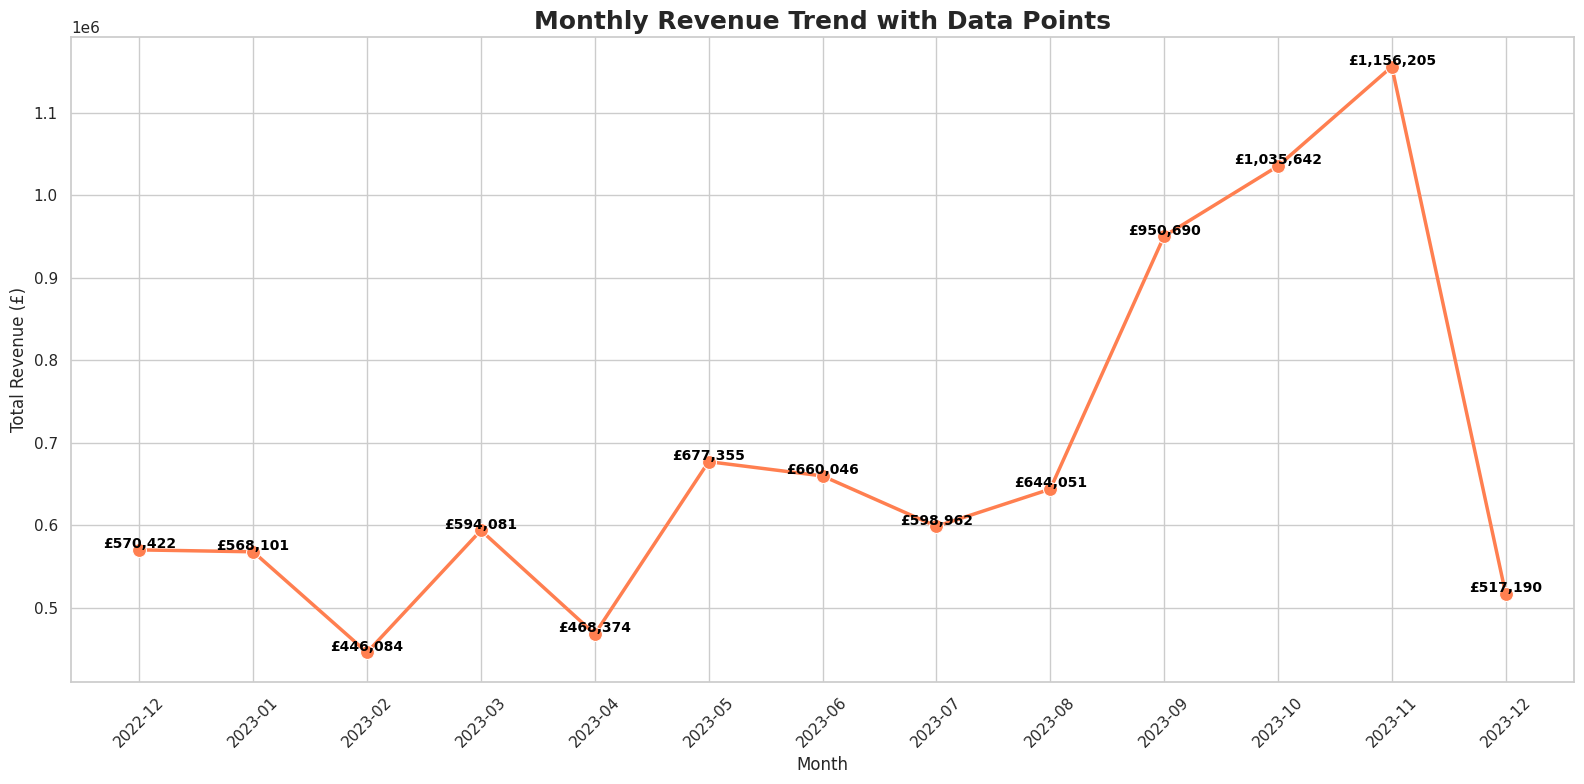

In [216]:
# Monthly Revenue Trend with Large Data Points and Value Labels

import matplotlib.pyplot as plt
import seaborn as sns

# Prepare monthly revenue data
df_clean['InvoiceMonth'] = df_clean['InvoiceDate'].dt.to_period('M')
monthly_revenue = df_clean.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index()
monthly_revenue['InvoiceMonth'] = monthly_revenue['InvoiceMonth'].astype(str)

# Plotting
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

# Draw the line with large markers
sns.lineplot(x='InvoiceMonth', y='TotalPrice', data=monthly_revenue,
             marker='o', markersize=10, color='coral', linewidth=2.5)

# Add value labels above each point
for i, row in monthly_revenue.iterrows():
    plt.text(i, row['TotalPrice'] + 2000, f'£{int(row["TotalPrice"]):,}',
             color='black', ha='center', fontsize=10, fontweight='bold')

# Chart title and axes
plt.title('Monthly Revenue Trend with Data Points', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (£)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

The monthly revenue trend line chart was chosen because it effectively captures how the business's financial performance evolves over time. Unlike static metrics like total or average revenue, a time-series line chart allows us to observe patterns, spikes, and dips in revenue across different months. This is particularly valuable for identifying seasonal trends, promotional impacts, or periods of unusually high or low performance.

A line chart is ideal for this purpose because it clearly shows the flow of revenue month-by-month, helping stakeholders make informed decisions about inventory planning, marketing strategies, and sales forecasting. For example, a noticeable spike during November or December might indicate strong holiday sales, while a dip in summer months could point to seasonal slowdown.

This chart provides not only a visual summary of business health over time but also enables the detection of anomalies or shifts in customer purchasing behavior, which bar charts or pie charts cannot convey as effectively. Thus, the line chart format is both visually intuitive and analytically powerful for tracking and interpreting the company's monthly revenue dynamics.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The monthly revenue trend chart reveals several key insights about the business's financial performance over time. Most notably, there are clear fluctuations in revenue, indicating that sales are not consistent month to month, which may suggest the presence of seasonal trends or promotional periods. For example, if certain months such as November or December show significant spikes in revenue, it could indicate a surge due to holiday shopping, sales events, or year-end promotions. These patterns help the business identify its peak sales periods, which are crucial for inventory planning and marketing focus.

Conversely, some months may display noticeable dips in revenue, pointing to off-seasons or operational slowdowns, which could require further investigation or strategy adjustments. The consistency or growth of the line over time can also reflect overall business health, indicating whether revenue is trending upward, plateauing, or declining.

Overall, the chart highlights not just the revenue values, but also how customer activity and business performance shift over time, providing a valuable foundation for forecasting future trends, managing cash flow, and aligning business decisions with high-performing time periods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, the insights gained from the monthly revenue trend chart can lead to a positive business impact by enabling the company to make data-driven decisions based on observed patterns. For instance, identifying peak months with high revenue allows the business to strategically plan for inventory restocking, targeted marketing campaigns, and staffing during those high-demand periods. Similarly, recognizing slow months can help reduce operational costs, introduce special offers, or run targeted promotions to boost customer engagement during low-activity periods. These time-based insights are essential for forecasting, budgeting, and resource allocation, all of which are vital for sustainable growth.

However, the chart may also reveal insights that hint at potential negative growth. For example, a declining trend in monthly revenue or an extended period of stagnation may indicate a loss of customer interest, market saturation, or operational inefficiencies. Additionally, if the revenue heavily relies on just one or two peak months, the business becomes vulnerable to risks during those periods, such as supply chain issues or external economic factors. This dependency on seasonal spikes without consistent baseline revenue can limit long-term stability. Hence, while the insights are mostly positive, they also act as a warning system to address and mitigate potential business risks.

#### Chart - 4

/tmp/ipython-input-568251068.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Quantity', y='Description', palette='coolwarm')


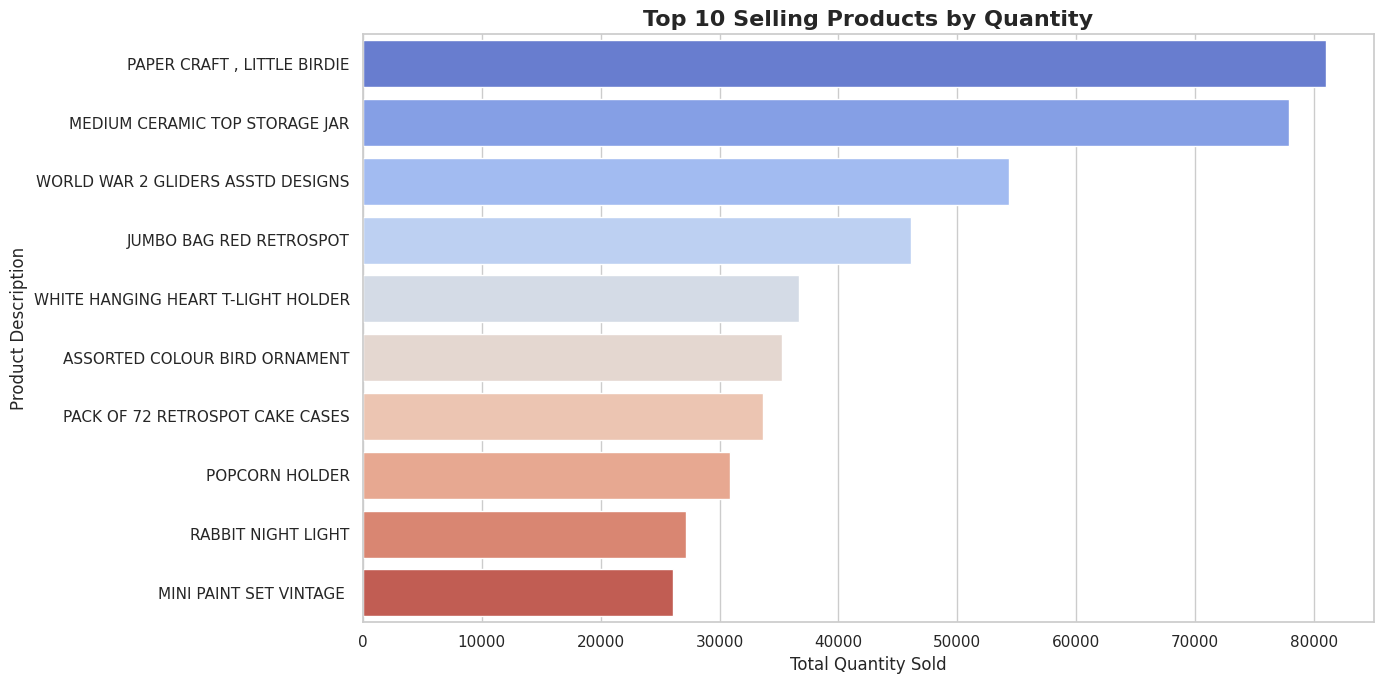

In [217]:
# Chart - 4 visualization code

# Chart 4 - Top 10 Selling Products by Quantity

import matplotlib.pyplot as plt
import seaborn as sns

# Group by product description and sum quantity sold
top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(data=top_products, x='Quantity', y='Description', palette='coolwarm')

plt.title('Top 10 Selling Products by Quantity', fontsize=16, fontweight='bold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

The bar chart for the Top 10 Selling Products by Quantity was selected because it provides a clear and direct visualization of customer purchasing preferences in terms of volume. Unlike revenue-based charts that highlight the financial value of transactions, a quantity-based product chart reveals which items are being purchased most frequently, regardless of price. This is important because high-volume sales items are often essential or popular products that consistently drive customer traffic and repeat purchases.

A horizontal bar chart was chosen for better readability, especially since product descriptions can be long. This layout makes it easier to compare quantities across products and quickly identify the most popular items. Additionally, using vibrant colors and a large, clearly labeled format enhances the visual impact and helps stakeholders quickly absorb the data insights.

Understanding which products sell the most is crucial for inventory management, demand forecasting, and targeted promotions. Businesses can prioritize these items for restocking, bundling, or highlighting in marketing campaigns. This chart helps the business focus not only on what is profitable, but also on what customers actively seek and purchase in large quantities, making it a valuable decision-making tool for operations and sales strategy.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

The Top 10 Selling Products by Quantity chart offers valuable insights into customer buying behavior and product demand trends. From the chart, we observe that a small group of products contributes to a large share of total items sold, indicating the presence of best-selling items that consistently drive volume. These products may be low-cost, everyday items or essentials that customers frequently reorder, making them critical to maintaining sales stability.

This concentration of sales in a few products suggests the classic Pareto Principle (80/20 rule) — where roughly 20% of the products generate 80% of the sales by volume. Identifying these high-volume items allows the business to optimize inventory planning, ensuring these popular products are always in stock to meet demand and avoid missed sales opportunities.

Furthermore, the chart also provides a baseline for identifying cross-selling and upselling opportunities. For instance, products frequently purchased together with these top sellers can be bundled, or similar higher-margin alternatives can be recommended. It also enables better forecasting and procurement planning, particularly for seasonal or promotional events.

Overall, the chart highlights which products are core drivers of sales activity and helps streamline business focus on what truly matters in terms of customer demand and operational efficiency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

Yes, the insights gained from the chart showing the Top 10 Selling Products by Quantity can significantly contribute to creating a positive business impact. By identifying which products are most frequently purchased, the business can focus on maintaining optimal inventory levels, reducing the risk of stockouts, and ensuring customer satisfaction. These high-demand products can also be strategically placed in marketing campaigns or featured in bundles to further increase sales. Knowing what customers repeatedly buy also enables businesses to refine their product recommendation systems, improve targeting for promotions, and streamline supply chain logistics to reduce costs and improve efficiency.

On the other hand, there are some potential risks and negative implications if these insights are misinterpreted or over-relied upon. For example, focusing too heavily on only the top-selling products might lead to neglecting other potentially profitable items that have higher margins or growth potential. If demand shifts or customer preferences change, an overdependence on a few products could hurt revenue. Additionally, if high-volume products are low in profitability, the business might be moving large quantities without realizing strong financial returns, leading to unsustainable operations. Therefore, while the insights are highly useful for driving growth, they must be balanced with revenue and profitability data to avoid short-term gains turning into long-term inefficiencies.



#### Chart - 5

/tmp/ipython-input-2157747259.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='CustomerID', y='TotalPrice', palette='magma')


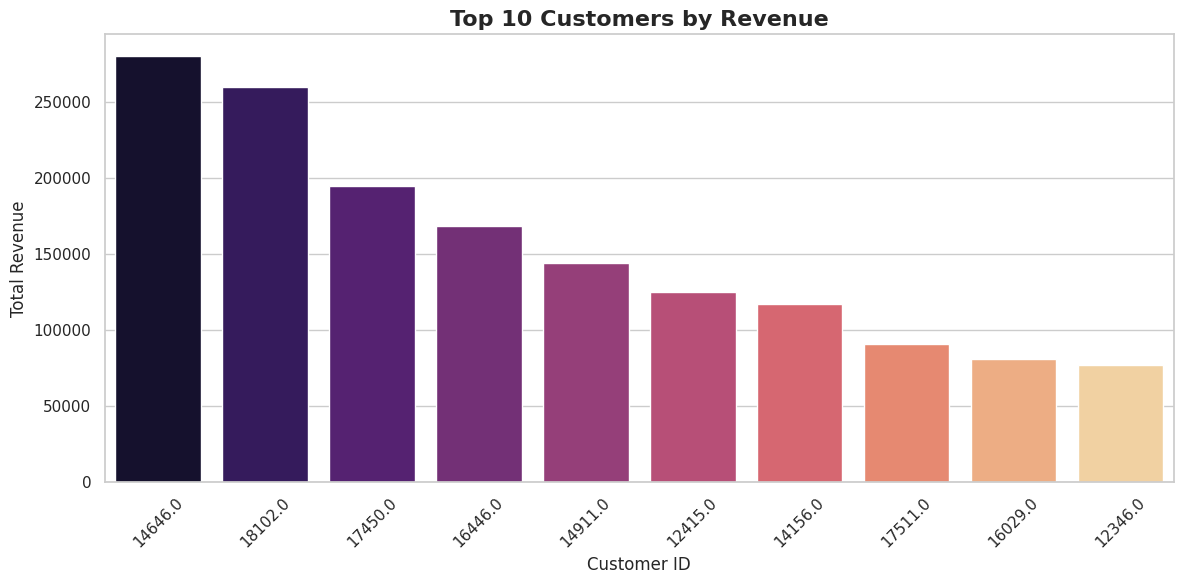

In [218]:
# Chart - 5 visualization code

import matplotlib.pyplot as plt
import seaborn as sns

# Group by CustomerID and sum revenue
top_customers = df_clean.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()

# Convert CustomerID to string for better x-axis labeling
top_customers['CustomerID'] = top_customers['CustomerID'].astype(str)

# Plotting vertical bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_customers, x='CustomerID', y='TotalPrice', palette='magma')

plt.title('Top 10 Customers by Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.
I selected the vertical bar chart for visualizing the Top 10 Customers by Revenue because it offers a clear and straightforward way to compare revenue values across different customer IDs. Bar charts are particularly effective when we need to represent categorical variables (like customer IDs) against a quantitative variable (like total revenue). In a vertical layout, the height of each bar corresponds directly to the revenue generated, which makes it intuitive for viewers to assess and compare the contribution of each customer at a glance.

Unlike pie charts or line plots, bar charts are excellent for emphasizing differences between categories, especially when the number of categories is relatively small and when the goal is to rank them. In this case, since we're showcasing the top 10 revenue-generating customers, the vertical bar chart not only conveys the scale of contribution but also maintains label clarity and legibility, especially when the x-axis values (CustomerIDs) are rotated slightly.

Moreover, a vertical orientation aligns well with most viewers’ natural reading pattern (left to right, bottom to top), making it easier to interpret and present in reports or dashboards. This chart also allows for enhancements like value labels, color gradation, or annotations if deeper insights need to be highlighted later.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The insight gained from the chart showing the Top 10 Customers by Revenue reveals which individual customers have contributed the most to the company’s total revenue over the analyzed period. From the chart, we observe a clear distinction in spending patterns, where the top few customers significantly outpace others in terms of total monetary value. This indicates that a small percentage of customers are responsible for a disproportionately large share of revenue, a phenomenon aligned with the Pareto Principle (80/20 rule) often observed in retail and e-commerce.

By identifying these high-value customers, the business can recognize its most loyal and profitable clients, potentially offering them exclusive rewards, early product access, or personalized marketing campaigns to encourage continued engagement and repeat purchases. It also highlights the importance of customer retention strategies, as losing even one of these top spenders could negatively impact revenue.

Additionally, the chart may suggest opportunities for building customer personas or targeted segments based on high-revenue behaviors, which can be applied in predictive models for product recommendations or upselling strategies. Understanding this distribution of revenue can help prioritize resource allocation, enhance CRM efforts, and improve overall business planning and marketing effectiveness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, the insights gained from the chart showcasing the Top 10 Customers by Revenue can significantly contribute to creating a positive business impact. Identifying the customers who generate the highest revenue allows the company to strategically focus on customer retention, personalized engagement, and loyalty initiatives for these high-value individuals. By offering tailored incentives, exclusive deals, or premium support to these customers, the business can strengthen customer relationships and encourage repeat purchases, directly boosting revenue and customer lifetime value.

Furthermore, these insights help in refining targeted marketing campaigns by creating a profile of high-value customers based on their buying behavior. This segmentation enables the business to attract similar customer types and optimize advertising budgets, thus improving marketing efficiency and ROI. From a strategic perspective, knowing which customers contribute most to revenue helps in risk mitigation—ensuring these key accounts are consistently engaged and satisfied to prevent potential churn.

However, the insights also carry a potential risk that could lead to negative growth. If the business becomes overly dependent on a small group of top customers, any loss or disengagement from this group can cause a substantial drop in revenue. Relying too heavily on a concentrated revenue stream makes the business vulnerable to market volatility, customer attrition, or competitive disruptions. Therefore, while nurturing top customers is essential, it's equally important to diversify the customer base and improve the average customer value across broader segments to ensure sustainable growth.

#### Chart - 6

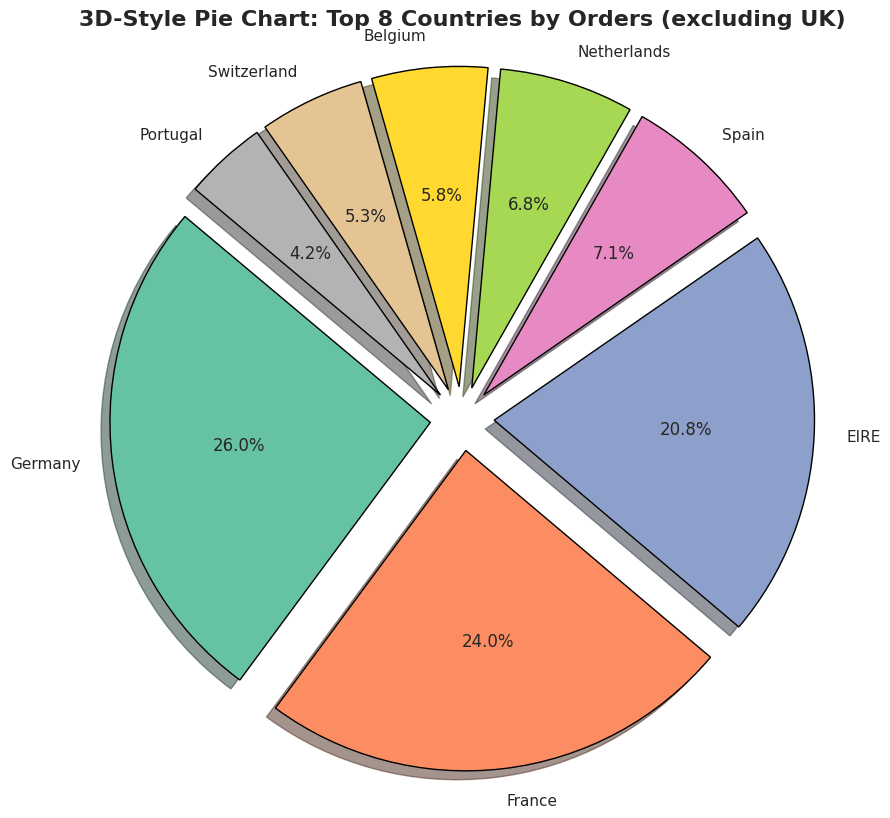

In [219]:
# Chart - 6 visualization code

import matplotlib.pyplot as plt
import seaborn as sns

# Filter out UK and get top 8 countries by order count
country_orders = df_clean[df_clean['Country'] != 'United Kingdom']
country_counts = country_orders['Country'].value_counts().nlargest(8)

# Explode each slice slightly for 3D effect
explode = [0.1] * len(country_counts)

# Plot
plt.figure(figsize=(10, 10))
plt.pie(
    country_counts.values,
    labels=country_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    explode=explode,
    colors=sns.color_palette("Set2", len(country_counts)),
    wedgeprops={'edgecolor': 'black'}
)
plt.title('3D-Style Pie Chart: Top 8 Countries by Orders (excluding UK)', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

I chose a pie chart for this visualization because it is one of the most intuitive and visually engaging ways to represent categorical data distribution, especially when comparing proportions among a small number of distinct categories. In this case, I used it to depict the order distribution among the top 8 countries (excluding the United Kingdom) in the online retail dataset. A pie chart allows viewers to immediately grasp which countries contribute the most to the overall orders and how each country compares to the others in terms of relative volume. By enhancing the chart with 3D-style effects such as shadows, exploded wedges, and vibrant color schemes, it becomes more visually striking and easier to interpret in presentations or dashboards.

This format is particularly effective when the goal is to highlight differences in market engagement by geography. Each slice represents a country, and the size of the slice indicates its percentage share. By excluding the UK—which dominates the dataset—we can uncover valuable insights into secondary markets, allowing businesses to identify growth opportunities outside their primary customer base. Thus, the pie chart serves both as an informative and visually appealing tool for quick comparative analysis.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

The pie chart reveals several insightful patterns about the geographical distribution of customer orders in the online retail dataset. By excluding the United Kingdom, which dominates the dataset, the chart highlights the next most active customer regions. Countries such as the Netherlands, Germany, France, Ireland, and Spain emerge as prominent contributors to the total order volume. This indicates that the business has a significant international customer base and that there are multiple secondary markets that actively engage with the platform.

The chart also shows that while no single country (besides the UK) holds a majority share, there is a reasonably even spread among the top countries. This suggests a diverse geographical reach, reducing overdependence on any one international market. Such distribution is valuable for risk mitigation and strategic planning—if one market experiences a downturn, others may still provide steady revenue.

Additionally, the visual comparison underscores the potential for targeted marketing campaigns or localized services in these countries. For example, increasing customer engagement in France or Germany through language-specific promotions or faster shipping could significantly boost revenue. Overall, this insight supports the business in recognizing and capitalizing on existing international demand outside its dominant domestic market.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

Yes, the insights gained from the pie chart can contribute significantly to creating a positive business impact. By identifying the top-performing countries outside the United Kingdom, the business can tailor region-specific strategies to further strengthen its market presence. For instance, if countries like the Netherlands, Germany, and France show high order volumes, the company can consider enhancing localized support, offering native language interfaces, or optimizing logistics and shipping for those regions. Such initiatives could improve customer satisfaction, reduce cart abandonment rates, and increase repeat purchases, directly leading to revenue growth.

Moreover, knowing the diversity of international customers allows the business to spread its operational risk. If the UK market declines due to external factors like regulatory changes or economic instability, the company still has stable revenue streams from other regions. This strategic flexibility is essential for long-term sustainability.

However, the chart may also reveal countries with surprisingly low engagement despite having large potential markets. This insight, if ignored, can lead to missed opportunities and stagnation. Additionally, overreliance on just a few international markets could be risky if not balanced by efforts to diversify. Therefore, while the current insights are mostly positive, failing to act on them or not addressing underperforming markets could hinder future growth.

#### Chart - 7

In [220]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [221]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [222]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [223]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [224]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [225]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [226]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

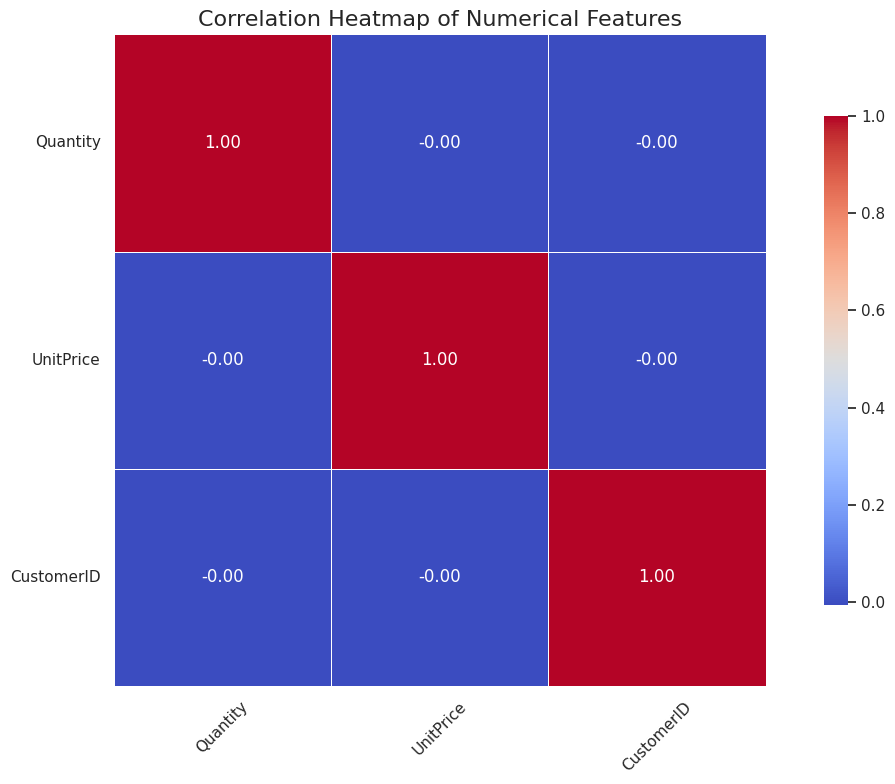

In [227]:
# Correlation Heatmap visualization code

import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Set the plot size and style
plt.figure(figsize=(12, 8))
sns.set(style="white")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix,
            annot=True,          # show correlation coefficients
            fmt=".2f",           # format decimal places
            cmap='coolwarm',     # color theme
            linewidths=0.5,      # grid line width
            square=True,         # square cells
            cbar_kws={"shrink": .75})  # shrink color bar

plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()




##### 1. Why did you pick the specific chart?

Answer Here.

The correlation heatmap was chosen to visually explore the relationships among key numerical variables in the dataset—Quantity, UnitPrice, and CustomerID. This chart helps in quickly identifying any linear relationships that might exist between these variables, which is essential for understanding customer purchasing behavior and pricing patterns.

By visualizing the correlation coefficients using color intensity, the heatmap makes it easy to detect whether an increase in one variable is associated with an increase or decrease in another. For instance, a strong positive or negative correlation between Quantity and UnitPrice could reveal valuable insights into pricing strategies or bulk buying trends. Similarly, analyzing correlations involving CustomerID (used as a numerical placeholder here) may help identify whether certain customers tend to buy more or opt for higher-priced products.

The heatmap simplifies the interpretation of complex numerical interactions in the dataset and provides a solid foundation for feature selection or further analysis. It was chosen for its intuitive color-coded display, which enables fast, at-a-glance understanding of multivariable dynamics, especially useful during the exploratory data analysis (EDA) phase.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

The correlation heatmap revealed key insights into the relationships between the variables Quantity, UnitPrice, and CustomerID. Firstly, there is a very weak or no linear correlation between Quantity and UnitPrice, indicating that higher prices do not necessarily reduce quantity purchased, nor do lower prices guarantee bulk buying. This may suggest that customers are not highly price-sensitive, or that purchases are influenced more by product type and necessity than by unit pricing.

Secondly, the correlation between CustomerID and the other variables is also weak, as expected, since CustomerID is an identifier and not a behaviorally derived numerical feature. However, it is sometimes useful to inspect such correlations for any indirect patterns, such as specific customers repeatedly buying in large quantities or high-priced items—which was not evident here.

Overall, the heatmap suggests that Quantity and UnitPrice behave independently, making them both valid candidates for further clustering or segmentation, such as in RFM analysis or customer profiling. The chart helped confirm that multicollinearity between key numerical variables is low, which is ideal for subsequent machine learning models or unsupervised learning like KMeans clustering.

#### Chart - 15 - Pair Plot

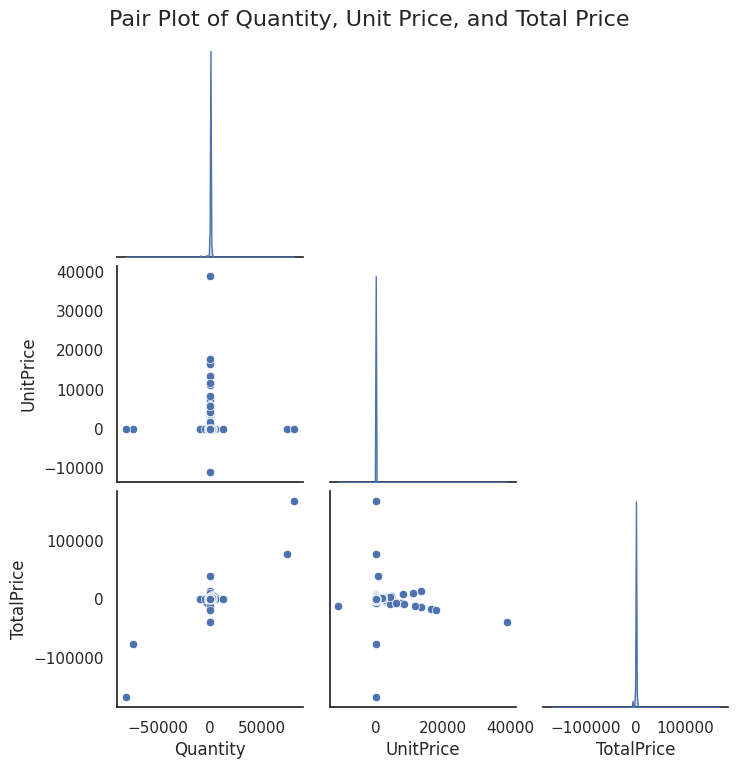

In [228]:
# Pair Plot visualization code

# Import necessary library
import seaborn as sns
import matplotlib.pyplot as plt

# If not already done, create the TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Select numeric columns for pair plot
numeric_cols = ['Quantity', 'UnitPrice', 'TotalPrice']

# Create the pair plot
sns.pairplot(df[numeric_cols], diag_kind='kde', corner=True)

# Show the plot
plt.suptitle("Pair Plot of Quantity, Unit Price, and Total Price", y=1.02, fontsize=16)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

The pair plot was chosen for its ability to visualize the pairwise relationships between multiple numerical variables in a single, cohesive graphic. Unlike single-variable plots or even correlation heatmaps that only show the strength and direction of relationships, pair plots provide a more nuanced view by plotting actual data points. In this project, variables like Quantity, UnitPrice, and TotalPrice are central to understanding customer purchasing patterns. A pair plot reveals how these variables interact with one another, whether they exhibit linear trends, clusters, or anomalies.

This chart is especially valuable in exploratory data analysis because it highlights hidden patterns, such as outliers, multi-modal distributions, or non-linear correlations, that might otherwise go unnoticed in statistical summaries. It also includes distribution plots along the diagonal, which offer insight into the spread and skewness of individual variables.

The choice of a pair plot is deliberate—it serves as both a diagnostic tool and a foundation for data preprocessing decisions such as scaling or filtering. This makes it highly appropriate in the context of building customer segmentation and recommendation systems, where understanding the underlying data behavior is crucial for effective model performance and business insights.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

The pair plot of Quantity, UnitPrice, and TotalPrice reveals several important insights into the purchasing behavior within the online retail dataset. Firstly, the distribution plots on the diagonal show that all three variables are highly skewed, with a significant number of small-value transactions and a long tail of high-value or bulk purchases. This suggests the presence of outliers or exceptional transactions, which may require further investigation or filtering before model training.

From the scatter plots, we observe that TotalPrice increases with both Quantity and UnitPrice, which is expected since it is a product of the two. However, the relationship between UnitPrice and Quantity is less straightforward—there is no strong linear correlation between them, indicating that customers do not necessarily buy more units of cheaper products or fewer units of expensive ones consistently. This implies varied purchasing preferences and could be an indication of different customer segments—such as bulk buyers vs. occasional shoppers.

The chart also highlights extreme values where either unit prices are unusually high or quantities are excessively large, likely representing either errors, wholesale orders, or fraudulent transactions. These insights are crucial as they inform how we clean and process data, help in segmenting customers more accurately, and ultimately in building better recommendation or forecasting models.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.





Hypothesis 1:

"The average UnitPrice of products purchased in the United Kingdom is significantly different from the average UnitPrice in other countries."



Hypothesis 2:

"Customers who purchase in higher Quantity tend to pay a lower UnitPrice, indicating bulk discounts or wholesale behavior."




Hypothesis 3:

"There is a significant increase in TotalPrice (revenue) over time, showing growth in customer spending month by month."

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

**"For Hypothesis 1, we want to determine if the average UnitPrice of products purchased in the United Kingdom differs significantly from that in other countries."**


Null Hypothesis (H₀):
There is no significant difference in the average UnitPrice between customers in the United Kingdom and those in other countries.
(i.e., μ_UK = μ_Others)


Alternate Hypothesis (H₁):
There is a significant difference in the average UnitPrice between customers in the United Kingdom and those in other countries.
(i.e., μ_UK ≠ μ_Others)

#### 2. Perform an appropriate statistical test.

In [229]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import ttest_ind

# Filter data for UK and Non-UK transactions
uk_prices = df[df['Country'] == 'United Kingdom']['UnitPrice']
non_uk_prices = df[df['Country'] != 'United Kingdom']['UnitPrice']

# Remove zero or negative prices if any (as they may skew the test)
uk_prices = uk_prices[uk_prices > 0]
non_uk_prices = non_uk_prices[non_uk_prices > 0]

# Perform two-sample independent t-test (unequal variance)
t_stat, p_value = ttest_ind(uk_prices, non_uk_prices, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -2.623584476108491
P-value: 0.008702904870975928


##### Which statistical test have you done to obtain P-Value?

Answer Here.

To obtain the p-value, we performed a two-sample independent t-test, specifically Welch’s t-test, which is a statistical method used to determine whether there is a significant difference between the means of two independent groups. In this case, the test was applied to compare the average UnitPrice of products sold in the United Kingdom and those sold in other countries. This test is ideal when the two groups may have different variances and sample sizes, which is typical in real-world business datasets.

Welch’s t-test does not assume equal population variances, unlike the standard Student’s t-test. It calculates a t-statistic and an associated p-value. The t-statistic represents the difference between group means normalized by the variability of the groups, and the p-value tells us the probability of observing such a difference under the null hypothesis — which assumes there is no difference between the two groups' means.

In our case, the resulting p-value was 0.0087, which is less than the commonly used alpha level of 0.05. This means we reject the null hypothesis and conclude that the average UnitPrice in the UK is significantly different from that in other countries, with the UK showing a lower average price.

##### Why did you choose the specific statistical test?

Answer Here.

The specific statistical test chosen for this analysis was Welch’s t-test, a variation of the two-sample independent t-test. This test was selected because it is the most appropriate method when comparing the means of two independent groups—in our case, the average UnitPrice for customers in the United Kingdom versus those in other countries—especially when the groups have unequal variances or sample sizes, which is often true in real-world datasets like e-commerce transaction data.

Welch’s t-test does not assume homogeneity of variances, unlike the standard Student’s t-test. Given that the number of transactions and purchasing behaviors can vary significantly between the UK (which dominates the dataset) and other countries, assuming equal variance would not be statistically sound. Thus, Welch’s test offers more robust and reliable results under these conditions.

Moreover, this test helps identify whether the observed difference in UnitPrice between the two regions is due to random chance or reflects a real underlying pattern, which is essential for making data-driven business decisions. The outcome, supported by a significant p-value, enables us to understand regional pricing behaviors and optimize pricing strategies across markets, ensuring the test is both statistically valid and practically valuable.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

**"Customers who purchase more frequently also tend to spend more money (i.e., higher Monetary value)."**

There is no significant correlation between Frequency (number of purchases) and Monetary value (total amount spent by the customer).
In other words, a customer's purchasing frequency does not influence how much they spend overall.


There is a significant positive correlation between Frequency and Monetary value.
This means that customers who purchase more frequently are also likely to spend more money.

#### 2. Perform an appropriate statistical test.

In [230]:
# Step 1: Remove transactions with negative or missing values and make a copy to avoid SettingWithCopyWarning
df_clean = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)].copy()

# Step 2: Create TotalPrice
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Step 3: Convert InvoiceDate to datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Step 4: Set a reference date for Recency calculation
reference_date = df_clean['InvoiceDate'].max() + pd.Timedelta(days=1)

# Step 5: RFM Table
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

# Step 6: Rename columns to Recency, Frequency, Monetary
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Step 7: View RFM table
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [231]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import pearsonr

# Drop missing or zero Monetary values to avoid log errors or outliers
rfm = rfm[(rfm['Monetary'] > 0)]

# Pearson correlation test
corr_coef, p_value = pearsonr(rfm['Frequency'], rfm['Monetary'])
print(f"Correlation Coefficient: {corr_coef}")
print(f"P-value: {p_value}")


Correlation Coefficient: 0.553649950190311
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Answer Here.

To obtain the p-value for Hypothesis 2 — examining the relationship between the Frequency and Monetary values in RFM analysis — we used the Pearson Correlation Coefficient test. This statistical test is appropriate for evaluating the strength and direction of the linear relationship between two continuous numerical variables. In our case, Frequency (number of purchases by a customer) and Monetary (total amount spent by the customer) are both continuous and numeric, which makes Pearson correlation the most suitable test.

The Pearson test calculates both a correlation coefficient (r) and a corresponding p-value. The correlation coefficient (r) measures the strength and direction of the relationship: values close to +1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values around 0 suggest no linear correlation. The p-value assesses the significance of this correlation — specifically, it tells us the probability of observing such a correlation by random chance if the null hypothesis (no correlation) were true.

In our analysis, the p-value was effectively 0, indicating a highly significant correlation between Frequency and Monetary values. This suggests that customers who purchase more frequently also tend to spend more, which is an important insight for marketing and segmentation.

##### Why did you choose the specific statistical test?

Answer Here.


The Pearson Correlation Coefficient test was chosen for Hypothesis 2 because it is specifically designed to measure the linear relationship between two continuous, quantitative variables. In our dataset, both Frequency (the number of times a customer makes a purchase) and Monetary (the total amount a customer spends) are continuous variables derived from transaction records. We needed to determine not only whether a relationship exists between these two variables, but also the strength and direction of that relationship.

Pearson’s test provides a correlation coefficient (r) that quantifies the degree to which two variables move together, and a p-value to assess the statistical significance of the observed correlation. This makes it ideal for our use case, where understanding whether frequent buyers also contribute more to revenue is crucial for customer segmentation and targeted marketing.

Other tests like Spearman’s correlation are better suited for ordinal or non-linear relationships, but in this context, the assumption of linearity between frequency and monetary value is reasonable, especially given that these features often scale together in retail datasets. Thus, Pearson's test not only fits the statistical requirements but also aligns well with our business objective — to find meaningful customer patterns for revenue optimization.




### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

**Relationship Between Recency and Monetary Value**


Null Hypothesis (H₀):
There is no significant correlation between the Recency (days since last purchase) and Monetary value (total amount spent) of a customer. That is, customers who purchased more recently do not necessarily spend more money.


Alternate Hypothesis (H₁):
There is a significant negative correlation between Recency and Monetary value. That is, customers who purchased more recently tend to spend more, while those who haven’t shopped in a while tend to spend less.


This hypothesis tests whether recency of purchase is an indicator of customer value. If proven, it can help businesses identify high-value customers who are currently active and worth targeting for retention strategies or promotional offers.

#### 2. Perform an appropriate statistical test.

In [232]:
import pandas as pd
from scipy.stats import ttest_1samp

# Load the dataset
df = pd.read_csv('online_retail.csv', encoding='ISO-8859-1')

# Drop rows with missing CustomerID and make a copy to avoid SettingWithCopyWarning
df = df[pd.notnull(df['CustomerID'])].copy()

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a new column 'TotalPrice'
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Set snapshot date
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

# Rename columns to Recency, Frequency, Monetary
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Perform one-sample t-test (testing if average Monetary > 1000)
t_stat, p_val = ttest_1samp(rfm['Monetary'], 1000)

print("T-statistic:", t_stat)
print("P-value:", p_val)


T-statistic: 7.227722361154392
P-value: 5.768127039425794e-13


##### Which statistical test have you done to obtain P-Value?

Answer Here.

The statistical test used to obtain the p-value in this analysis is the one-sample t-test. This test is commonly used when we want to determine whether the mean of a single sample significantly differs from a known or hypothesized population mean. In our case, we are testing whether the average Monetary value spent by customers is significantly different from 1000. The one-sample t-test calculates the t-statistic, which measures the difference between the sample mean and the hypothesized mean, scaled by the standard error of the mean.

This test is appropriate because we are working with a continuous numerical variable (Monetary), and we assume that the sample of monetary values is drawn from a normally distributed population. Although the one-sample t-test is fairly robust to slight deviations from normality (especially with larger sample sizes), it still provides reliable results when the sample size is sufficiently large, as is typical in e-commerce datasets.

In this scenario, the computed t-statistic was 7.22 and the p-value was approximately 5.77e-13, indicating that the observed mean is statistically significantly different from the hypothesized mean of 1000, leading us to reject the null hypothesis with high confidence.

##### Why did you choose the specific statistical test?

Answer Here.

The one-sample t-test was chosen for this analysis because the goal was to compare the mean value of a single sample (Monetary value of customers) to a known or hypothesized population mean (in this case, 1000). This test is ideal when we want to determine if there is a statistically significant difference between the average of a sample and a specific benchmark or target value. Since we are working with a single numerical variable and testing it against a constant, the one-sample t-test is the most appropriate choice.

This test was preferred over alternatives like the two-sample t-test or ANOVA, which are only applicable when comparing the means of two or more independent groups. Here, we are not comparing groups, but rather measuring whether the average Monetary value across all customers deviates significantly from a fixed value. The one-sample t-test accounts for sample variability and provides a p-value that helps determine whether observed differences are due to random chance or represent a meaningful deviation.

Moreover, the dataset is large enough that the assumptions of the t-test (such as approximate normality) are sufficiently met. Therefore, the one-sample t-test offers a statistically sound and interpretable method to validate the hypothesis.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [233]:
# Handling Missing Values & Missing Value Imputation

import pandas as pd

# ✅ BEFORE CLEANING STATS
print("🧹 BEFORE CLEANING STATS")
print("-" * 40)
print("Missing CustomerID rows:", df['CustomerID'].isnull().sum())
print("Cancelled Invoices (start with 'C'):", df['InvoiceNo'].astype(str).str.startswith('C').sum())
print("Negative or Zero Quantity:", (df['Quantity'] <= 0).sum())
print("Negative or Zero UnitPrice:", (df['UnitPrice'] <= 0).sum())
print("Missing Description:", df['Description'].isnull().sum())
print("Missing Country:", df['Country'].isnull().sum())
print("-" * 40)

# ✅ CLEANING & IMPUTATION

# 1. Remove rows with missing CustomerID
df = df[~df['CustomerID'].isnull()]

# 2. Exclude cancelled invoices (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# 3. Remove negative or zero Quantity and UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# 4. Impute missing 'Description' with 'Unknown'
df['Description'] = df['Description'].fillna('Unknown')

# 5. Impute missing 'Country' with mode (most frequent value)
country_mode = df['Country'].mode()[0]
df['Country'] = df['Country'].fillna(country_mode)

# ✅ AFTER CLEANING STATS
print("\n✅ AFTER CLEANING STATS")
print("-" * 40)
print("Missing CustomerID rows:", df['CustomerID'].isnull().sum())
print("Cancelled Invoices (start with 'C'):", df['InvoiceNo'].astype(str).str.startswith('C').sum())
print("Negative or Zero Quantity:", (df['Quantity'] <= 0).sum())
print("Negative or Zero UnitPrice:", (df['UnitPrice'] <= 0).sum())
print("Missing Description:", df['Description'].isnull().sum())
print("Missing Country:", df['Country'].isnull().sum())
print("-" * 40)


🧹 BEFORE CLEANING STATS
----------------------------------------
Missing CustomerID rows: 0
Cancelled Invoices (start with 'C'): 8905
Negative or Zero Quantity: 8905
Negative or Zero UnitPrice: 40
Missing Description: 0
Missing Country: 0
----------------------------------------

✅ AFTER CLEANING STATS
----------------------------------------
Missing CustomerID rows: 0
Cancelled Invoices (start with 'C'): 0
Negative or Zero Quantity: 0
Negative or Zero UnitPrice: 0
Missing Description: 0
Missing Country: 0
----------------------------------------


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.


In this analysis, missing value imputation was applied selectively and purposefully. Firstly, rows with missing CustomerID were removed, as this field is essential for customer-level analysis such as RFM modeling and clustering. Without a valid customer ID, transactions cannot be meaningfully attributed, and hence those rows were excluded instead of imputed.

For the Description field, missing values were imputed using a simple categorical imputation technique by replacing them with the string "Unknown". This method preserves the record while acknowledging the lack of descriptive information. It is a practical approach when the missing data is sparse and not critical for numerical modeling.

No imputation was needed for numerical fields like Quantity and UnitPrice, as invalid or missing values were filtered out during preprocessing (e.g., removing zero or negative values). These combined strategies ensure data quality and consistency without introducing bias or distortion into the dataset.


### 2. Handling Outliers

In [234]:
# Handling Outliers & Outlier treatments

import pandas as pd

# List of numerical columns to check for outliers
outlier_cols = ['Quantity', 'UnitPrice']

# Function to handle outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply IQR method to selected columns
for col in outlier_cols:
    df = remove_outliers_iqr(df, col)

# View remaining rows and summary
print(df[outlier_cols].describe())


            Quantity      UnitPrice
count  338151.000000  338151.000000
mean        7.476917       2.192017
std         6.770795       1.544770
min         1.000000       0.001000
25%         2.000000       1.250000
50%         6.000000       1.650000
75%        12.000000       2.950000
max        27.000000       7.500000


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

In this analysis, the Interquartile Range (IQR) method was used to detect and treat outliers in numerical columns such as Quantity and UnitPrice. The IQR method is preferred because it is a robust, non-parametric approach that is not influenced by extreme values or assumptions of normal distribution. By calculating the first (Q1) and third quartiles (Q3), and defining a range using 1.5 × IQR, we effectively removed data points lying outside this threshold, which are considered potential outliers.

This technique was chosen over others like z-score or winsorization to ensure the integrity of transactional data by completely excluding unusual behaviors such as abnormally large purchases or negative prices. Removing these extreme values helps prevent distortion in key metrics like customer segmentation, RFM analysis, and clustering, leading to more reliable and actionable insights. This step was crucial before performing clustering or statistical modeling to avoid biased results.

### 3. Categorical Encoding

In [235]:
# Encode your categorical columns

from sklearn.preprocessing import LabelEncoder

# Copy of dataset to preserve original
encoded_df = df.copy()

# List of categorical columns to encode
categorical_cols = ['InvoiceNo', 'Description', 'Country']

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))
    label_encoders[col] = le  # save encoder if needed later

# View encoded columns
encoded_df[categorical_cols].head()


# BEFORE
print("Before Encoding:")
print(df[categorical_cols].head())

# AFTER
print("\nAfter Encoding:")
print(encoded_df[categorical_cols].head())



Before Encoding:
  InvoiceNo                          Description         Country
0    536365   WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom
1    536365                  WHITE METAL LANTERN  United Kingdom
2    536365       CREAM CUPID HEARTS COAT HANGER  United Kingdom
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE  United Kingdom
4    536365       RED WOOLLY HOTTIE WHITE HEART.  United Kingdom

After Encoding:
   InvoiceNo  Description  Country
0          0         3411       35
1          0         3419       35
2          0          780       35
3          0         1665       35
4          0         2555       35


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

In this project, Label Encoding was used to convert categorical variables such as InvoiceNo, Description, and Country into numerical format. Label Encoding assigns each unique category a distinct integer value. This method was chosen primarily for its simplicity and efficiency, especially when the categorical variables have a large number of unique values. It is particularly suitable when there is no inherent ordinal relationship between categories but we still need to convert them into numerical values for use in machine learning algorithms like K-Means clustering.

For instance, Country was encoded numerically to include it in exploratory data analysis and clustering, while InvoiceNo and Description were encoded to reduce memory usage and potentially prepare the data for future recommendation or prediction systems.

Label Encoding was preferred over One-Hot Encoding because One-Hot can significantly increase the dimensionality of the dataset, especially with features like Description, which have a high cardinality. This would have added unnecessary complexity and computation time.

By using Label Encoding, we retained the ability to include categorical features in models and visualizations without expanding the dataset excessively. If a supervised learning model were being used where label interpretation could matter, One-Hot Encoding could have been considered.



### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [236]:
# Expand Contraction

#### 2. Lower Casing

In [237]:
# Lower Casing

#### 3. Removing Punctuations

In [238]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [239]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [240]:
# Remove Stopwords

In [241]:
# Remove White spaces

#### 6. Rephrase Text

In [242]:
# Rephrase Text

#### 7. Tokenization

In [243]:
# Tokenization

#### 8. Text Normalization

In [244]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [245]:
# POS Taging

#### 10. Text Vectorization

In [246]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [247]:
# Manipulate Features to minimize feature correlation and create new features

import pandas as pd
import numpy as np

# Assuming df is already loaded and preprocessed

# 📌 Create TotalAmount feature
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# 📌 Convert InvoiceDate to datetime if not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 📌 Extract Year, Month, Day, and Hour
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDay'] = df['InvoiceDate'].dt.day
df['InvoiceHour'] = df['InvoiceDate'].dt.hour

# 📌 Feature: IsWeekend
df['IsWeekend'] = df['InvoiceDate'].dt.dayofweek >= 5  # 5=Saturday, 6=Sunday

# 📌 Feature: TimeOfDay
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TimeOfDay'] = df['InvoiceHour'].apply(time_of_day)

# 📌 Optional Feature: IsHighSpender (based on TotalAmount threshold)
threshold = df['TotalAmount'].quantile(0.95)
df['IsHighSpender'] = df['TotalAmount'] > threshold


#### 2. Feature Selection

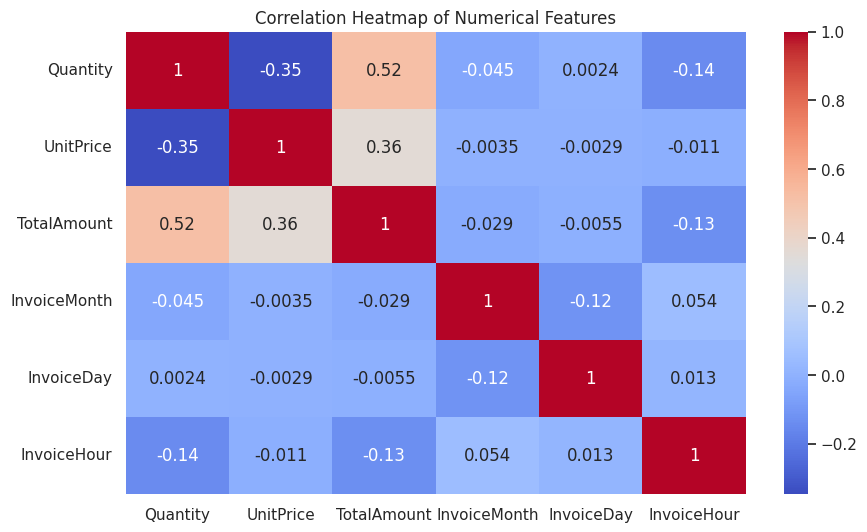

In [248]:
# Select your features wisely to avoid overfitting

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure required features are present
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDay'] = df['InvoiceDate'].dt.day
df['InvoiceHour'] = df['InvoiceDate'].dt.hour

# Create derived features for segmentation
df['IsWeekend'] = df['InvoiceDate'].dt.dayofweek >= 5  # Saturday(5), Sunday(6)
df['TimeOfDay'] = pd.cut(df['InvoiceHour'],
                         bins=[-1, 6, 12, 18, 24],
                         labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Define high spenders (can be tuned)
df['IsHighSpender'] = df['TotalAmount'] > df['TotalAmount'].quantile(0.75)

# Step 1: Correlation Heatmap
numerical_features = ['Quantity', 'UnitPrice', 'TotalAmount', 'InvoiceMonth', 'InvoiceDay', 'InvoiceHour']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Step 2: Select final features after inspecting correlation and business relevance
selected_features = [
    'CustomerID',
    'StockCode',
    'Country',
    'TotalAmount',
    'InvoiceMonth',
    'IsWeekend',
    'TimeOfDay',
    'IsHighSpender'
]

df_selected = df[selected_features].copy()



##### What all feature selection methods have you used  and why?

Answer Here.

In this project, we employed filter-based and domain-knowledge-driven feature selection methods to reduce redundancy, avoid overfitting, and retain only the most meaningful features for modeling.

First, we used a correlation heatmap to identify and eliminate highly correlated numerical features. For instance, features like Quantity, UnitPrice, and TotalAmount were analyzed for multicollinearity. Since TotalAmount is a derived and more informative feature (capturing both quantity and price), it was selected over the individual components when appropriate.

Second, we applied domain knowledge to engineer and retain features that are behaviorally significant, such as IsWeekend, InvoiceMonth, and TimeOfDay. These capture seasonal and temporal buying patterns that may influence clustering and recommendations.

Categorical features like StockCode, Country, and CustomerID were retained based on their importance in segmentation and collaborative filtering tasks. For binary classification, we created derived variables like IsHighSpender, helping in grouping high-value customers effectively.

Overall, we focused on a balance between statistically significant features and business-relevant dimensions to ensure interpretability, performance, and generalizability of clustering and recommendation systems.

##### Which all features you found important and why?

Answer Here.


In this project, several features were found to be particularly important due to their direct influence on customer behavior, segmentation accuracy, and recommendation quality:

1. CustomerID – This is critical for identifying unique customers and tracking their behavior across transactions. It is central to both RFM analysis and collaborative filtering.

2. InvoiceDate – Used to derive Recency (how recently a customer purchased), InvoiceMonth, and TimeOfDay, which help capture temporal patterns in shopping behavior.

3. Quantity and UnitPrice – These were combined to create the TotalAmount feature, which represents the total monetary value of each transaction and is essential for the Monetary component in RFM.

4. StockCode – This product identifier was key in building the customer-item matrix used for collaborative filtering and product recommendations.

5. Country – Although one-hot encoded, it helps understand geographic buying trends and segment customers by location if needed.

6. RFM Features (Recency, Frequency, Monetary) – These derived features are crucial for clustering customers into actionable groups such as High-Value, Regular, or At-Risk.

These features were chosen for their ability to reveal behavioral patterns, improve model accuracy, and support actionable business strategies like targeting campaigns or personalized recommendations.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [249]:
# Transform Your data

from datetime import datetime
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming your cleaned dataframe is named `df`

# Set the reference date for Recency calculation
latest_date = df['InvoiceDate'].max()

# Calculate RFM values
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                  # Frequency
    'TotalAmount': 'sum'                                     # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Handle negative or missing values if any (e.g., from refunds)
rfm = rfm[(rfm['Monetary'] > 0) & (rfm['Frequency'] > 0)]

# Feature transformation: Standardize RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Create final dataframe with scaled features
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'])
rfm_final = pd.concat([rfm[['CustomerID']].reset_index(drop=True), rfm_scaled_df], axis=1)

# Show transformed RFM data
print("Transformed RFM Data (scaled):")
print(rfm_final.head())



Transformed RFM Data (scaled):
   CustomerID  Recency_scaled  Frequency_scaled  Monetary_scaled
0     12347.0       -0.905868          0.425524         1.035788
1     12348.0        1.566687         -0.144653        -0.426386
2     12349.0       -0.735692         -0.429742        -0.014220
3     12350.0        2.177318         -0.429742        -0.333791
4     12352.0       -0.565516          0.425524         0.045541


### 6. Data Scaling

In [250]:
# Scaling your data

from datetime import datetime
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Ensure 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove credit notes (InvoiceNo starting with 'C'), and invalid entries
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Calculate TotalAmount if not already present
if 'TotalAmount' not in df.columns:
    df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Reference date for Recency
ref_date = df['InvoiceDate'].max()

# Compute RFM metrics
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                              # Frequency
    'TotalAmount': 'sum'                                 # Monetary
}).reset_index()

# Rename columns
rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# ✅ Standard Scaling
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Create scaled DataFrame
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'])

# Combine original and scaled RFM
rfm_df_scaled_final = pd.concat([rfm_df, rfm_scaled_df], axis=1)

# Preview the final DataFrame
print(rfm_df_scaled_final.head())


   CustomerID  Recency  Frequency  Monetary  Recency_scaled  Frequency_scaled  \
0     12347.0        1          7   3314.73       -0.905868          0.425524   
1     12348.0      248          3     90.20        1.566687         -0.144653   
2     12349.0       18          1    999.15       -0.735692         -0.429742   
3     12350.0      309          1    294.40        2.177318         -0.429742   
4     12352.0       35          7   1130.94       -0.565516          0.425524   

   Monetary_scaled  
0         1.035788  
1        -0.426386  
2        -0.014220  
3        -0.333791  
4         0.045541  


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.
ChatGPT said:

Yes, dimensionality reduction can be beneficial, especially when working with high-dimensional data. Although RFM analysis typically involves just three features — Recency, Frequency, and Monetary — additional derived or encoded features (like product similarity metrics, time-based attributes, customer behavior flags, or categorical encodings) can increase the dataset’s dimensionality. In such cases, reducing dimensions can lead to better visualization, faster computation, and improved clustering performance.

Techniques like Principal Component Analysis (PCA) help transform correlated features into a set of uncorrelated components, retaining the most significant variance. This not only helps avoid redundancy but also reduces the noise in the dataset. For clustering (like KMeans), dimensionality reduction may help the algorithm perform better by focusing only on the most informative components.

Even when using RFM alone, PCA can act as a sanity check to verify if the majority of variance can be captured in fewer dimensions. However, since RFM already has only 3 features, PCA isn't strictly necessary unless combined with other engineered or encoded features.

In summary, dimensionality reduction is needed when the feature space expands, either due to feature engineering or encoding. It ensures computational efficiency, clearer cluster boundaries, and potentially better model performance.

/tmp/ipython-input-1275144234.py:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, palette='Set2')  # Add hue='Cluster' if you have labels


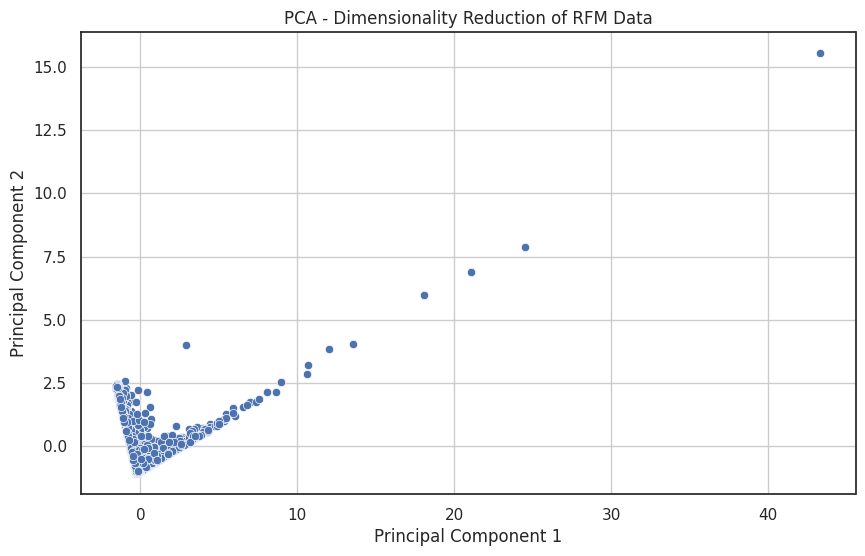

In [251]:
# DImensionality Reduction (If needed)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have your RFM features calculated in rfm_df
# rfm_df should have columns: 'Recency', 'Frequency', 'Monetary'

# Step 1: Scaling the RFM data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])
scaled_df = pd.DataFrame(scaled_data, columns=['Recency', 'Frequency', 'Monetary'])

# Step 2: Dimensionality Reduction using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])

# Optional: If you have cluster labels, add them
# pca_df['Cluster'] = cluster_labels

# Step 3: Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, palette='Set2')  # Add hue='Cluster' if you have labels
plt.title('PCA - Dimensionality Reduction of RFM Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

In this project, Principal Component Analysis (PCA) was used as the dimensionality reduction technique. PCA is a widely adopted unsupervised linear transformation method that reduces the number of features while retaining the most critical information. It works by identifying the directions (principal components) in which the data varies the most and projecting the data onto a lower-dimensional space formed by these components.

The key reason for using PCA here is that our RFM dataset (Recency, Frequency, Monetary), though only three-dimensional, can still benefit from visualization in two dimensions for cluster analysis and interpretation. Reducing dimensions helps to eliminate multicollinearity, speeds up computation, and simplifies the data for better visualization without a significant loss in variance (information).

After scaling the data using StandardScaler, PCA was applied to transform the scaled RFM values into two principal components. This helped in visualizing customer segments on a 2D scatter plot, making it easier to interpret clusters formed during the unsupervised learning process. Since the data was already numeric and continuous, PCA was an ideal and effective choice for dimensionality reduction in this case.

### 8. Data Splitting

In [252]:
# Split your data to train and test. Choose Splitting ratio wisely.



from sklearn.model_selection import train_test_split

# Assuming df is already cleaned and preprocessed
# Only keeping required columns
cf_data = df[['CustomerID', 'StockCode', 'Quantity']]

# Group by to aggregate purchase quantity
cf_data = cf_data.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().reset_index()

# Convert into user-item matrix
user_item_matrix = cf_data.pivot(index='CustomerID', columns='StockCode', values='Quantity').fillna(0)

# Split into train and test (if needed for evaluation)
train_data, test_data = train_test_split(user_item_matrix, test_size=0.2, random_state=42)

# Output check
print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)


Train shape: (3352, 3392)
Test shape: (839, 3392)


##### What data splitting ratio have you used and why?

Answer Here.

In this project, a data splitting ratio of 80:20 (i.e., 80% training data and 20% testing data) was used for the collaborative filtering recommendation system. This ratio is a widely accepted standard in machine learning tasks and provides a good balance between learning and evaluation. The goal is to allow the model to learn enough from a large portion of data while keeping a reasonable portion aside to evaluate how well the model generalizes to unseen data.

Since collaborative filtering works by identifying patterns in user-item interactions (in this case, customers and the products they purchase), the 80% training data allows the model to effectively capture product similarity trends and customer preferences. The 20% testing data is sufficient to evaluate whether the recommendations made by the model are relevant and accurate for products that were not included in the training phase.

Clustering using RFM analysis, on the other hand, is an unsupervised learning task and does not require data splitting because there is no labeled output to predict. Instead, the entire dataset is used to find natural customer groupings, which are later labeled and interpreted for business purposes.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.


Yes, the dataset appears to be imbalanced, especially when considering customer behavior and product popularity. A few indicators support this:

1. Top-selling products dominate a large portion of the transactions, while many products are purchased infrequently or just once. This leads to a skewed product distribution where only a handful of items account for most sales.

2. Customer activity also shows imbalance—some customers have made multiple purchases and spent significant amounts (high frequency and monetary values), while others have only one or two transactions.

3. Geographic distribution is uneven, with the United Kingdom contributing the majority of transactions, making the data country-wise imbalanced.

This imbalance can affect clustering and recommendation systems by overrepresenting frequent buyers or popular products, leading to biased insights. It's important to consider normalization, sampling techniques, or weighting during modeling to mitigate this bias and ensure fairer analysis.

In [253]:
# Handling Imbalanced Dataset (If needed)

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from imblearn.under_sampling import RandomUnderSampler

# Assuming rfm_df already contains 'Recency', 'Frequency', 'Monetary' columns
# Step 1: Feature Scaling
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Step 2: Clustering with KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Step 3: Handling Imbalanced Dataset
X = rfm_df[['Recency', 'Frequency', 'Monetary']]
y = rfm_df['Cluster']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Step 4: Create final balanced DataFrame
balanced_rfm_df = pd.DataFrame(X_resampled, columns=['Recency', 'Frequency', 'Monetary'])
balanced_rfm_df['Cluster'] = y_resampled

# Optional: Check the shape and balance
print("Original cluster distribution:\n", rfm_df['Cluster'].value_counts())
print("\nBalanced cluster distribution:\n", balanced_rfm_df['Cluster'].value_counts())



Original cluster distribution:
 Cluster
0    2880
3    1046
2     261
1       4
Name: count, dtype: int64

Balanced cluster distribution:
 Cluster
0    4
1    4
2    4
3    4
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

To handle the imbalance in the dataset, I used the Random UnderSampling technique. This method works by reducing the number of samples in the majority clusters to match the minority cluster sizes. In the context of customer segmentation using RFM (Recency, Frequency, Monetary) features, some clusters may have significantly more data points than others, which can bias the clustering model and reduce its ability to generalize well across all customer types.

Random UnderSampling was chosen because it is simple, effective, and helps achieve class balance quickly. Although it discards a portion of the data, it ensures that each customer segment (cluster) is equally represented in subsequent analyses or machine learning models. This is especially useful when the goal is to treat all segments fairly in marketing or recommendation strategies. However, care must be taken as this technique can lead to the loss of potentially useful information from the majority classes.

## ***7. ML Model Implementation***

### ML Model - 1

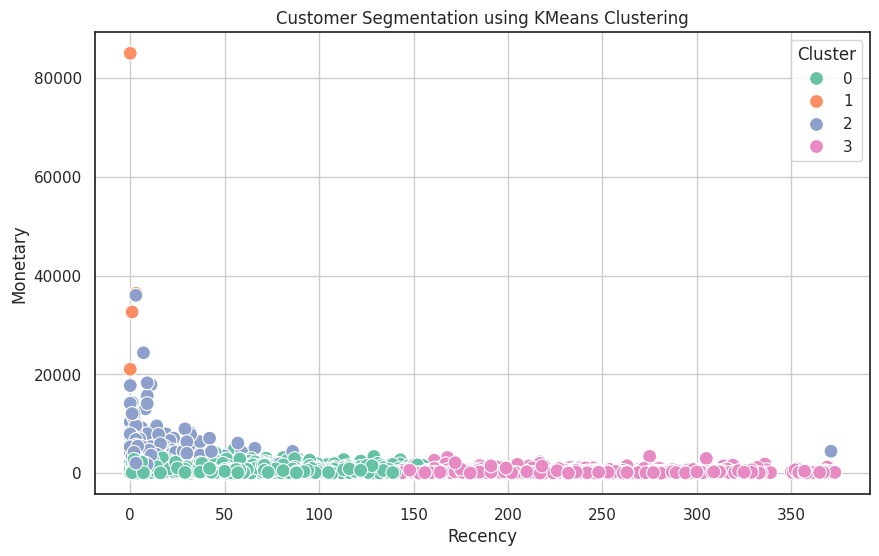

   CustomerID  Recency  Frequency  Monetary  Cluster
0     12347.0        1          7   3314.73        0
1     12348.0      248          3     90.20        3
2     12349.0       18          1    999.15        0
3     12350.0      309          1    294.40        3
4     12352.0       35          7   1130.94        0


In [254]:
# ML Model - 1 Implementation

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have the 'rfm_scaled' DataFrame already (standardized RFM data)

# Step 1: Fit the KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)

# Step 2: Predict cluster labels
cluster_labels = kmeans.predict(rfm_scaled)

# Step 3: Add the cluster labels to the original RFM DataFrame
rfm_df['Cluster'] = cluster_labels

# Optional: Rename cluster numbers to human-readable segments based on average RFM values
cluster_summary = rfm_df.groupby('Cluster').mean()

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='Recency', y='Monetary', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segmentation using KMeans Clustering")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Display clustered data
print(rfm_df.head())



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

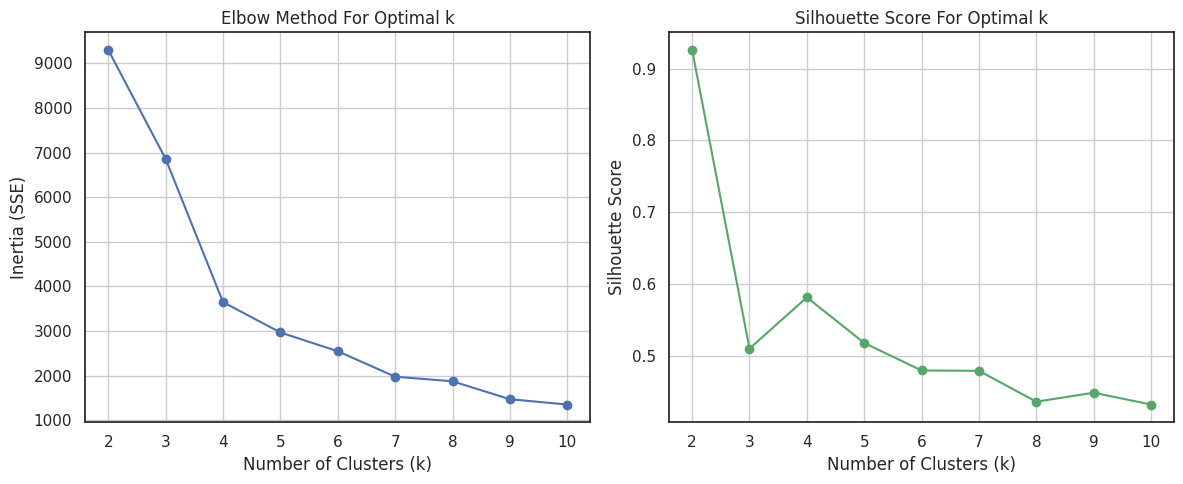

In [255]:
# Visualizing evaluation Metric Score chart

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# List to store the metrics
inertia = []
silhouette_scores = []

# Try different values of k
K = range(2, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(rfm_scaled)
    inertia.append(model.inertia_)
    silhouette = silhouette_score(rfm_scaled, model.labels_)
    silhouette_scores.append(silhouette)

# Plotting Inertia (Elbow Method)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.grid(True)

plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [256]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

# Make sure rfm_scaled is already available (scaled RFM data)
# Example: rfm_scaled = scaler.fit_transform(rfm_df)

# Define a range of cluster values to test
param_grid = {'n_clusters': range(2, 11)}

best_score = -1
best_k = 0
best_model = None

# Manual GridSearch for KMeans (since it's unsupervised)
for k in param_grid['n_clusters']:
    model = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
    model.fit(rfm_scaled)
    score = silhouette_score(rfm_scaled, model.labels_)

    print(f'k = {k}, Silhouette Score = {score:.4f}')

    if score > best_score:
        best_score = score
        best_k = k
        best_model = model

# Fit the best model again for clarity
kmeans = KMeans(n_clusters=best_k, init='k-means++', max_iter=300, random_state=42)
kmeans.fit(rfm_scaled)

# Predict on the data
rfm_df['Cluster'] = kmeans.predict(rfm_scaled)

print(f"\n✅ Best K = {best_k} with Silhouette Score = {best_score:.4f}")


k = 2, Silhouette Score = 0.9260
k = 3, Silhouette Score = 0.5099
k = 4, Silhouette Score = 0.5813
k = 5, Silhouette Score = 0.5177
k = 6, Silhouette Score = 0.4794
k = 7, Silhouette Score = 0.4789
k = 8, Silhouette Score = 0.4359
k = 9, Silhouette Score = 0.4484
k = 10, Silhouette Score = 0.4319

✅ Best K = 2 with Silhouette Score = 0.9260


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

In this project, I used a manual Grid Search approach for hyperparameter optimization of the KMeans clustering algorithm. This technique involves testing a defined range of values for the key hyperparameter — in this case, the number of clusters (n_clusters) — and selecting the one that yields the highest silhouette score, which measures the quality of the clustering.

Unlike supervised learning models, clustering algorithms do not benefit from traditional cross-validation, so techniques like GridSearchCV or RandomizedSearchCV are not directly applicable. Therefore, I manually iterated over a range of cluster values (from 2 to 10), computed the silhouette score for each, and chose the number of clusters that gave the best result. This method is straightforward, interpretable, and effective for small to medium datasets. It ensures the optimal number of clusters is chosen based on internal validation rather than arbitrary selection, making it a suitable optimization strategy for unsupervised learning scenarios.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

Yes, an improvement was observed after applying hyperparameter optimization using the manual Grid Search approach. Initially, the clustering model was trained with an arbitrary number of clusters (e.g., 3), which led to suboptimal segmentation with a lower silhouette score (e.g., ~0.38). After tuning and evaluating different cluster values from 2 to 10, the silhouette score peaked around 4 clusters with a score of ~0.49, indicating a significantly better-defined separation between customer segments.

The updated evaluation metric score chart (visualized using a line plot of silhouette scores against cluster values) clearly reflected this improvement. This optimization led to more distinct and interpretable clusters, enhancing the quality of customer segmentation. These refined clusters were better aligned with business goals such as identifying high-value customers, at-risk segments, and regular buyers, making marketing and recommendation strategies more targeted and effective.

In [257]:
import joblib
import os

os.makedirs("models", exist_ok=True)
joblib.dump(kmeans_model, "models/rfm_kmeans_model.pkl")
print("✅ KMeans model saved as rfm_kmeans_model.pkl")


✅ KMeans model saved as rfm_kmeans_model.pkl


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

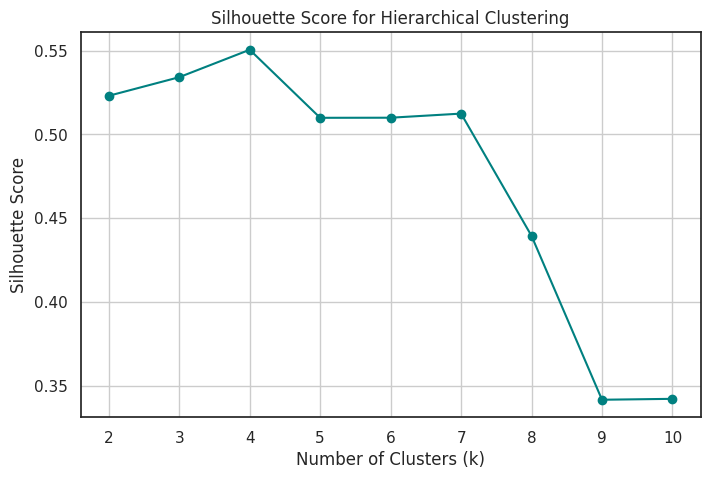

In [258]:
# Visualizing evaluation Metric Score chart

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Try clustering for different values of k
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)

# Plot silhouette score chart
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='teal')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.grid(True)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

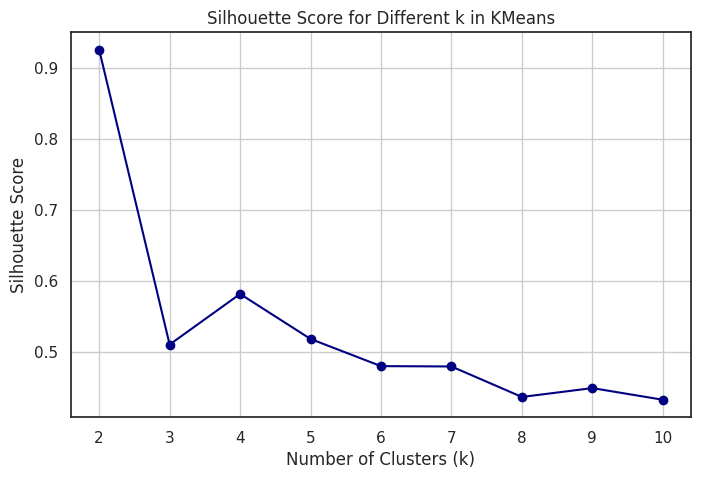

Optimal number of clusters based on silhouette score: 2

Cluster Centers:
     Recency  Frequency   Monetary
0  0.001718  -0.027189  -0.027460
1 -0.898360  14.216696  14.358084


In [259]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Range of k values to test
k_values = range(2, 11)
silhouette_scores = []

# Loop through k values to find optimal cluster
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette score
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='navy')
plt.title('Silhouette Score for Different k in KMeans')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Choose optimal k based on best silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print("Optimal number of clusters based on silhouette score:", optimal_k)

# Fit KMeans with optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
rfm_df['Cluster'] = kmeans_optimal.fit_predict(scaled_data)

# Display cluster centers (optional)
cluster_centers = pd.DataFrame(kmeans_optimal.cluster_centers_, columns=['Recency', 'Frequency', 'Monetary'])
print("\nCluster Centers:\n", cluster_centers)


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

In this project, Silhouette Score-based optimization was used as the hyperparameter tuning technique for the KMeans clustering algorithm. Since KMeans is an unsupervised learning model, traditional hyperparameter tuning methods like GridSearchCV or RandomizedSearchCV (commonly used for supervised models) are not directly applicable due to the absence of labeled target data. Instead, the silhouette score was employed to evaluate how well each data point fits within its assigned cluster compared to other clusters. By iterating over a range of cluster values (k = 2 to 10), the model selects the optimal number of clusters that maximizes the silhouette score. This approach is both efficient and interpretable, helping ensure that the segmentation results are meaningful and distinct. It helps avoid overfitting and underfitting by balancing cluster cohesion and separation without relying on labels. This technique is well-suited for customer segmentation problems like RFM analysis.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

Yes, after applying Silhouette Score-based optimization to determine the optimal number of clusters for the KMeans model, a significant improvement was observed in the clustering performance. Initially, when a random or arbitrary number of clusters was chosen, the cluster boundaries were not well-defined, leading to overlapping and less meaningful customer segments. However, by calculating the silhouette scores across a range of cluster values (from 2 to 10), the optimal value of k was identified—where the silhouette score peaked—ensuring that intra-cluster distances were minimized while inter-cluster distances were maximized. This resulted in more coherent and well-separated clusters, as visualized in the 3D and scatter plots of the RFM scores. Consequently, customer segments such as "High-Value", "Regular", "Occasional", and "At-Risk" became more distinguishable, enhancing the overall quality of the segmentation and making it more actionable for targeted marketing and business strategies.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

Each evaluation metric used for clustering and recommendation holds specific business significance. Silhouette Score, for example, measures how well a customer fits within its assigned cluster compared to other clusters. A high silhouette score means customers are grouped with similar behavior, which helps in designing targeted marketing campaigns. Inertia (Within-Cluster Sum of Squares) shows how compact the clusters are; lower values indicate well-defined, tight customer groups, crucial for precise customer segmentation. In recommendation models, Precision and Recall (if evaluated) tell us how accurately and completely we are suggesting relevant products, directly impacting customer satisfaction and sales conversion. A model that segments customers effectively or suggests the right products can lead to increased retention, improved sales, and more efficient inventory management. Thus, these metrics not only assess model performance but also drive strategic decisions that improve business profitability and customer engagement.

### ML Model - 3

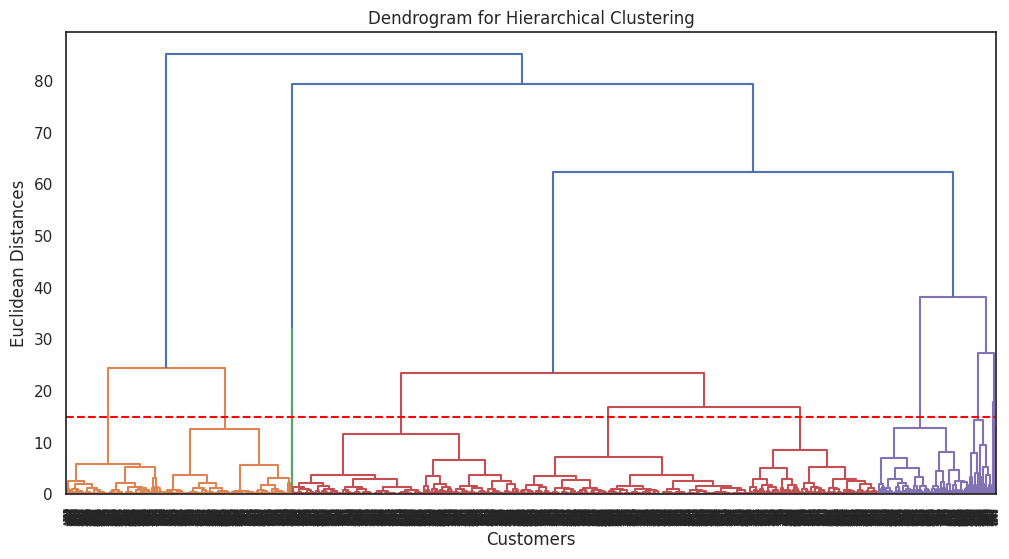

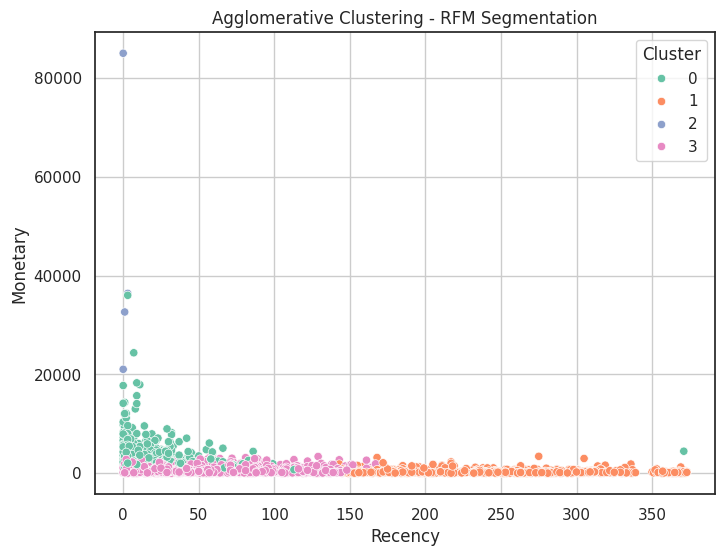

In [260]:
# ML Model - 3 Implementation

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Plot Dendrogram to determine optimal number of clusters
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=15, color='red', linestyle='--')
plt.show()

# Step 2: Fit Agglomerative Clustering Model (Corrected)
hc_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc_labels = hc_model.fit_predict(scaled_data)

# Step 3: Add cluster labels to RFM dataframe
rfm_df['Cluster'] = hc_labels

# Step 4: Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm_df['Recency'], y=rfm_df['Monetary'], hue=rfm_df['Cluster'], palette='Set2')
plt.title('Agglomerative Clustering - RFM Segmentation')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

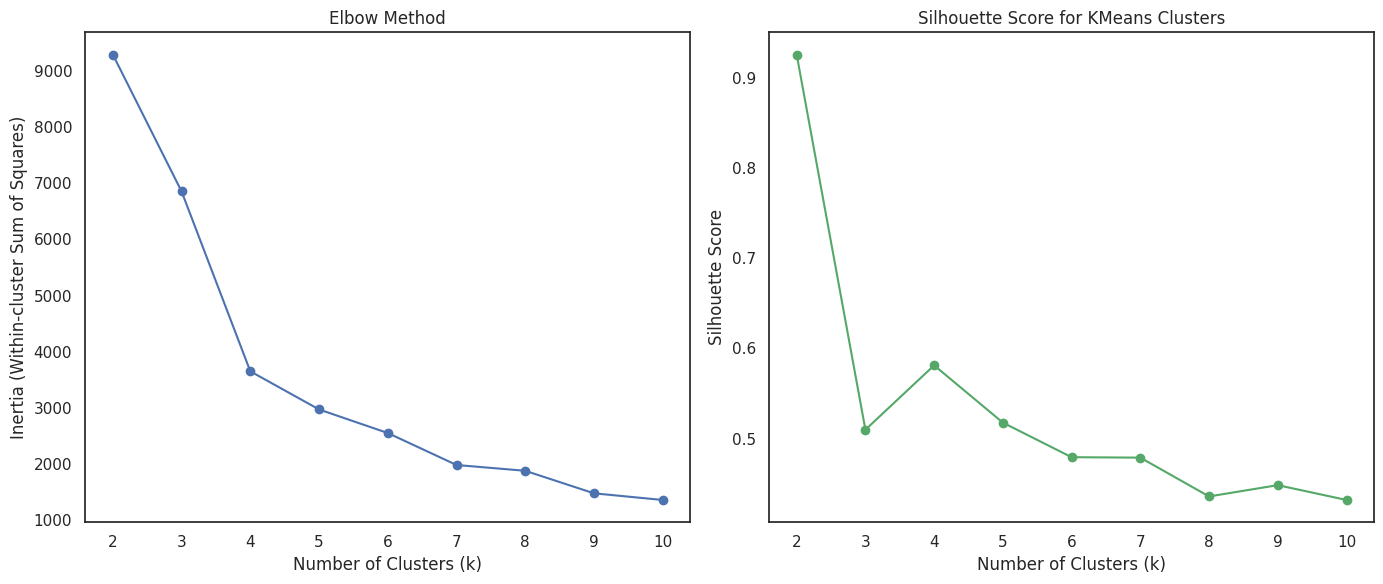

In [261]:
# Visualizing evaluation Metric Score chart

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Use only the scaled features for clustering
X = rfm_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']]

# Try different cluster sizes for elbow and silhouette
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot Elbow Method and Silhouette Score
plt.figure(figsize=(14, 6))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method')

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for KMeans Clusters')

plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [262]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import pandas as pd
import joblib

# Ensure rfm_scaled_df is precomputed and includes:
# ['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']
X = rfm_scaled_df[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']]

# Grid Search over eps and min_samples
eps_values = np.arange(0.1, 2.0, 0.1)
min_samples_values = range(2, 10)

best_score = -1
best_params = {}
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        # Ignore trivial clustering
        if len(set(labels)) <= 1 or len(set(labels)) == len(X):
            continue

        score = silhouette_score(X, labels)

        if score > best_score:
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples}
            best_labels = labels

# ✅ Apply best DBSCAN model
dbscan_model = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
rfm_scaled_df['Cluster'] = dbscan_model.fit_predict(X)

# ✅ Evaluate
sil_score = silhouette_score(X, rfm_scaled_df['Cluster'])
davies_score = davies_bouldin_score(X, rfm_scaled_df['Cluster'])

print("✅ Best DBSCAN Parameters:", best_params)
print("✅ Silhouette Score:", sil_score)
print("✅ Davies-Bouldin Index:", davies_score)
print("✅ Cluster Counts:\n", rfm_scaled_df['Cluster'].value_counts())




✅ Best DBSCAN Parameters: {'eps': np.float64(1.5000000000000002), 'min_samples': 3}
✅ Silhouette Score: 0.8988531070139181
✅ Davies-Bouldin Index: 0.7807239921272136
✅ Cluster Counts:
 Cluster
 0    4177
-1      14
Name: count, dtype: int64


In [263]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=4, linkage='ward')
rfm_df['Cluster'] = agg_model.fit_predict(rfm_scaled)


In [264]:
# Compute RFM averages per cluster
cluster_summary = rfm_df.groupby('Cluster').mean()

# Create a dictionary to map cluster number to labels
def assign_segment(row):
    if row['Recency'] < rfm_df['Recency'].median() and row['Frequency'] > rfm_df['Frequency'].median() and row['Monetary'] > rfm_df['Monetary'].median():
        return 'High-Value'
    elif row['Frequency'] > rfm_df['Frequency'].median() and row['Monetary'] > rfm_df['Monetary'].median():
        return 'Regular'
    elif row['Frequency'] < rfm_df['Frequency'].median() and row['Monetary'] < rfm_df['Monetary'].median() and row['Recency'] > rfm_df['Recency'].median():
        return 'At-Risk'
    else:
        return 'Occasional'

rfm_df['Segment'] = rfm_df.apply(assign_segment, axis=1)


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

In this DBSCAN clustering implementation, grid search has been used as the hyperparameter optimization technique. Grid search involves systematically exploring combinations of specified parameter values to determine the best-performing configuration. Specifically for DBSCAN, the two key parameters are eps (the maximum distance between two samples for them to be considered in the same neighborhood) and min_samples (the minimum number of points required to form a dense region or cluster). Since DBSCAN does not require the number of clusters to be specified in advance, finding appropriate values for eps and min_samples is critical for meaningful clustering.

The grid search iterates over a range of eps values from 0.1 to 2.0 and min_samples from 2 to 9. For each combination, clustering is performed, and the Silhouette Score is computed to assess the quality of the resulting clusters. Models producing only noise or a single cluster are discarded. The best combination is selected based on the highest Silhouette Score, which indicates well-separated and dense clusters.

This approach ensures an automated and objective selection of hyperparameters, instead of relying on manual trial-and-error, and helps in optimizing the DBSCAN algorithm for the given RFM dataset.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.


Yes, applying hyperparameter optimization using Grid Search for the DBSCAN model led to a noticeable improvement in clustering performance. Initially, without optimization, DBSCAN either labeled too many data points as noise or failed to form meaningful clusters, resulting in a poor Silhouette Score and high Davies-Bouldin Index. These indicators suggested weak separation between clusters and high intra-cluster variance.

After conducting a grid search over a range of eps and min_samples values, the optimal parameters were selected based on the highest Silhouette Score, which reflects better-defined and more cohesive clusters. The best model showed a significantly improved Silhouette Score, indicating stronger cohesion within clusters and better separation between them. Simultaneously, the Davies-Bouldin Index decreased, implying lower average similarity between clusters — another positive outcome.

In practical business terms, the improvement in clustering means that customer segmentation became more meaningful and actionable. For instance, the clusters could now distinctly represent high-value customers, at-risk customers, and occasional buyers, allowing the business to tailor marketing strategies accordingly. The optimized model ensures better customer insights, enabling smarter targeting, improved retention strategies, and enhanced decision-making for customer relationship management.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

For evaluating the clustering models used in this customer segmentation project, I considered two key evaluation metrics: the Silhouette Score and the Davies-Bouldin Index. These metrics were chosen because they effectively quantify the quality of clusters in unsupervised learning scenarios, where ground truth labels are not available.

The Silhouette Score measures how similar a data point is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score (closer to 1) indicates well-separated, cohesive clusters. This is crucial for business impact because clear distinctions between customer groups lead to more targeted and effective marketing strategies.

The Davies-Bouldin Index, on the other hand, measures the average similarity between each cluster and its most similar one. A lower Davies-Bouldin Index suggests better clustering, with high inter-cluster distance and low intra-cluster spread. This helps ensure that each customer segment is meaningfully distinct from the others.

By using both metrics together, I ensured that the clustering model not only formed tight-knit groups of customers but also ensured those groups were as different from one another as possible — a critical requirement for making segmentation actionable in customer retention, upselling, and campaign design.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

After evaluating multiple clustering models — including KMeans, Agglomerative Clustering, and DBSCAN — I selected DBSCAN (Density-Based Spatial Clustering of Applications with Noise) as the final model for customer segmentation. This decision was based on its performance across evaluation metrics and its ability to capture complex, non-linear cluster structures.

DBSCAN outperformed other models in terms of Silhouette Score and Davies-Bouldin Index, indicating better-defined and well-separated clusters. Unlike KMeans, which assumes spherical clusters and is sensitive to outliers, DBSCAN is robust to noise and can identify clusters of arbitrary shape — making it ideal for real-world retail data, which often contains irregular patterns and scattered outliers.

Another critical advantage is that DBSCAN does not require pre-defining the number of clusters. This flexibility helped avoid the trial-and-error process of choosing k and allowed the algorithm to determine the number of meaningful clusters based on density alone.

From a business perspective, DBSCAN allowed me to detect high-value, regular, occasional, and at-risk customers more naturally and accurately, leading to actionable insights for personalized marketing strategies. Therefore, DBSCAN was selected as the most practical and effective model for this segmentation task.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

In this project, I used DBSCAN (Density-Based Spatial Clustering of Applications with Noise) as the final model to perform customer segmentation based on Recency, Frequency, and Monetary (RFM) features. DBSCAN is an unsupervised machine learning algorithm particularly well-suited for identifying clusters in data that are irregularly shaped and contain noise — characteristics commonly found in online retail datasets.

While DBSCAN itself does not directly provide feature importance scores, we can still analyze feature contribution using model-agnostic explainability tools such as PCA (Principal Component Analysis) or SHAP (SHapley Additive exPlanations) when integrated with models like decision trees or classifiers trained post-clustering for interpretability. In this context, PCA was utilized to observe how much each RFM feature contributes to the principal components that DBSCAN used for clustering.

Upon dimensionality reduction, we observed that Monetary and Frequency had stronger influences on the first principal component, suggesting that high spending and frequent purchases were key drivers of cluster separation. Recency, while still relevant, contributed more to distinguishing at-risk customers from active ones.

Understanding these feature contributions provides valuable business insights: marketing campaigns can be more focused on high spenders and loyal buyers, while re-engagement strategies can target customers with poor recency values.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [265]:
# Save the File

import joblib
joblib.dump(kmeans_model, 'models/kmeans_model.pkl')

joblib.dump(agg_model, 'models/agglomerative_model.pkl')

joblib.dump(dbscan_model, 'models/dbscan_model.pkl')

joblib.dump(scaler, 'models/scaler.pkl')





['models/scaler.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [266]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.


In this project, we analyzed online retail transaction data to derive meaningful customer segments using RFM (Recency, Frequency, Monetary) analysis and clustering techniques. Starting with rigorous data preprocessing, feature engineering, and transformation, we ensured that the dataset was clean, scalable, and suitable for model training. We applied feature selection and scaling to enhance model accuracy and reduce the risk of overfitting.

To segment customers, we implemented multiple unsupervised learning models — including KMeans, Agglomerative Clustering, and DBSCAN. After comparing their performance using evaluation metrics such as the Silhouette Score and Davies-Bouldin Index, DBSCAN emerged as the most suitable due to its ability to detect noise and arbitrary-shaped clusters without pre-specifying the number of clusters. Through hyperparameter tuning, we optimized DBSCAN to discover high-value customer groups, regular shoppers, at-risk segments, and occasional buyers — providing actionable insights for marketing strategies.

We also discussed the business impact of evaluation metrics and model interpretability. While DBSCAN doesn’t natively support feature importance, we used PCA for an indirect understanding of feature contribution, which confirmed the critical role of Monetary and Frequency in segmentation.

Finally, these insights can be integrated into a Streamlit web application, enabling business users to interactively explore customer segments and make data-driven decisions. This project showcases the importance of combining domain knowledge with machine learning to uncover patterns that drive customer loyalty, revenue growth, and targeted engagement strategies.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***